In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024
The Grand Prix of São Paulo (formerly Grand Prix of Brazil, in Portuguese: Grande Prêmio do Brasil) is a motor racing race held in Brazil since 1972, which has been valid for the Formula 1 World Championship since 1973. It is currently held at the Autódromo José Carlos Pace in Interlagos (city of São Paulo); previously it was also held at the Autódromo Internacional Nelson Piquet in Jacarepaguá, Rio de Janeiro.
Traditionally, the Brazilian Grand Prix was held in the autumn, opening the season or within the first three rounds of the championship. In 2004, it was held at the end of the season due to improvements to the facilities at Interlagos; however, due to the greater public success of the switch to spring, it has continued to be held towards the end of the season since then, often as the closing race. As a result, it has been the venue for defining the champion frequently in recent years. Examples include Vettel's three-time championship, Fernando Alonso's two-time championship, and the championships of Kimi Räikkonen, Lewis Hamilton and Jenson Button.
The most victorious driver in the race is Frenchman Alain Prost, with six wins. Argentina's Carlos Reutemann and Germany's Michael Schumacher follow with four wins each. The Brazilian Grand Prix winners are champions Emerson Fittipaldi, Nelson Piquet and Ayrton Senna, as well as José Carlos Pace and Felipe Massa. Sao Paulo's Rubens Barrichello competed 17 times at Interlagos, with a best finish of third in 2004 and 11 retirements.
From 2021 it will be renamed the ‘Grand Prix of São Paulo’.

Source: Wikipedia

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Rear Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>

<tr>
    <td>
    McLaren
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Front suspension
    </td>
    <td>
    Performance
    </td>
</tr>

<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
</table>

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2024,country_acronym='BRA')

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
0,9626,Practice 1,2024-11-01T14:30:00+00:00,2024-11-01T15:30:00+00:00,-03:00:00,Practice,1249,São Paulo,10,BRA,Brazil,14,Interlagos,2024
1,9631,Sprint Qualifying,2024-11-01T18:30:00+00:00,2024-11-01T19:14:00+00:00,-03:00:00,Qualifying,1249,São Paulo,10,BRA,Brazil,14,Interlagos,2024
2,9635,Sprint,2024-11-02T14:00:00+00:00,2024-11-02T15:00:00+00:00,-03:00:00,Race,1249,São Paulo,10,BRA,Brazil,14,Interlagos,2024


## Free Practice 1
### Obtain setup

In [63]:
practice = libraryDataF1.obtain_information('laps',session_key=9626)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9626)
drivers = libraryDataF1.obtain_information('drivers',session_key=9626)

In [64]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==50,'team_name'] = 'Haas'

In [65]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1249,9626,77,262.0,194,NaN,2024-11-01T14:30:04.073000+00:00,NaN,True,NaN,47.213,18.548,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2051, 2051, 2051]","[2051, 2051, 2051, 2051, 2049]",1,MEDIUM,BOT,Valtteri BOTTAS,Kick Sauber
1,1249,9626,10,282.0,198,NaN,2024-11-01T14:30:15.221000+00:00,NaN,True,NaN,51.940,18.429,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 0]",1,MEDIUM,GAS,Pierre GASLY,Alpine
2,1249,9626,24,240.0,153,NaN,2024-11-01T14:30:20.644000+00:00,NaN,True,NaN,49.274,19.267,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2048, 2048, 2049, 0]",1,MEDIUM,ZHO,ZHOU Guanyu,Kick Sauber
3,1249,9626,31,271.0,190,NaN,2024-11-01T14:30:24.402000+00:00,NaN,True,NaN,50.835,18.624,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2051, 2051]",1,MEDIUM,OCO,Esteban OCON,Alpine
4,1249,9626,18,285.0,169,NaN,2024-11-01T14:30:29.379000+00:00,NaN,True,NaN,52.846,26.771,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049]",1,HARD,STR,Lance STROLL,Aston Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1249,9626,16,306.0,155,211.0,2024-11-01T15:33:16.927000+00:00,113.402,False,38.041,49.457,25.904,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],31,SOFT,LEC,Charles LECLERC,Ferrari
556,1249,9626,44,233.0,247,246.0,2024-11-01T15:33:30.523000+00:00,90.023,False,24.801,41.379,23.843,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],30,MEDIUM,HAM,Lewis HAMILTON,Mercedes
557,1249,9626,24,301.0,176,248.0,2024-11-01T15:33:32.776000+00:00,NaN,False,21.798,46.632,NaN,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],27,SOFT,ZHO,ZHOU Guanyu,Kick Sauber
558,1249,9626,22,NaN,182,252.0,2024-11-01T15:33:38.375000+00:00,92.873,False,22.136,45.515,25.222,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],25,SOFT,TSU,Yuki TSUNODA,RB


### See race pace by means of the charts

### Medium tyres

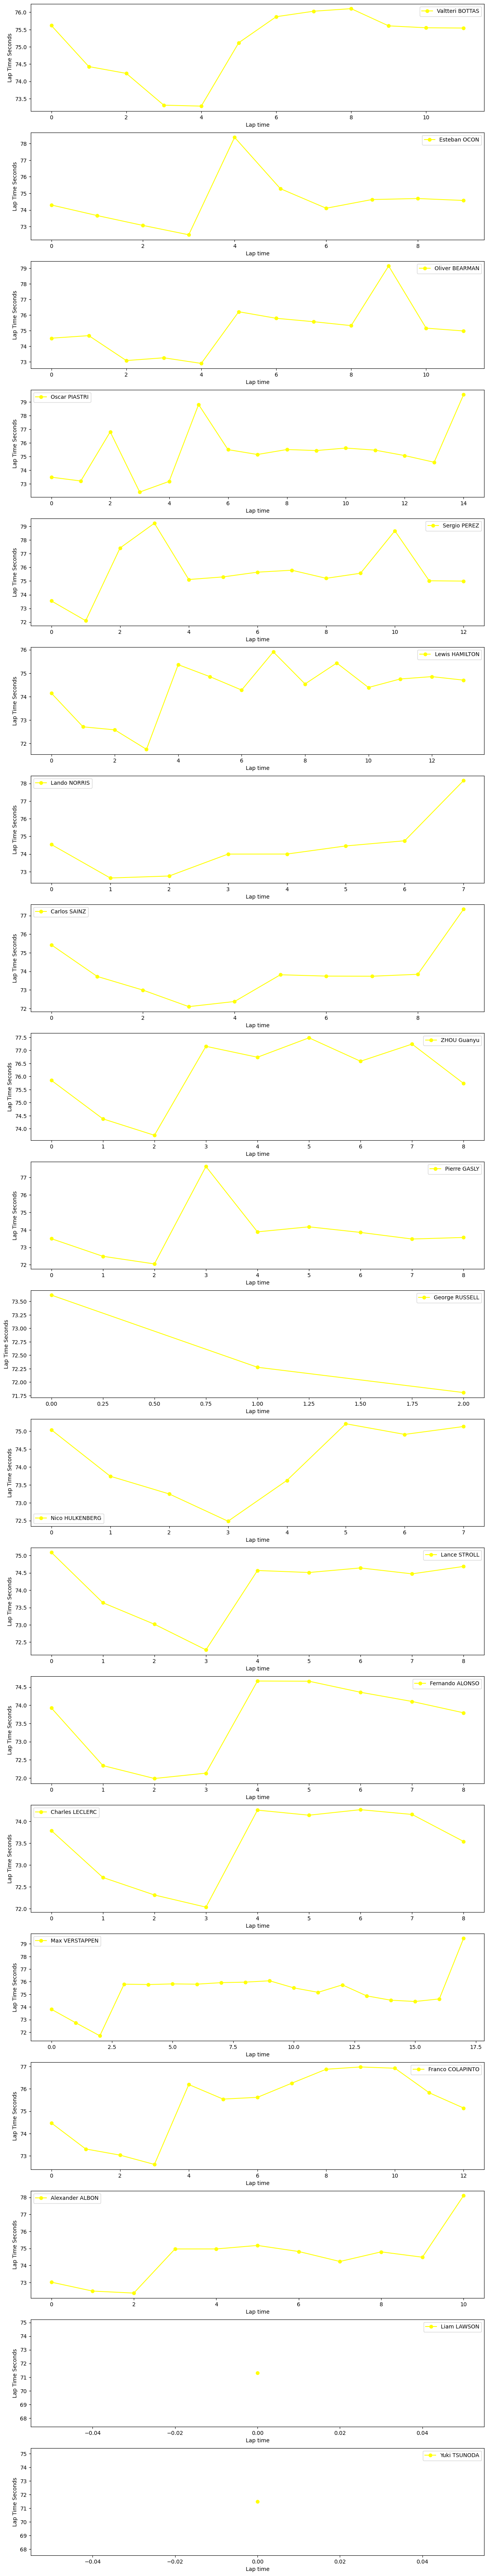

In [66]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",80)

### Soft tyres

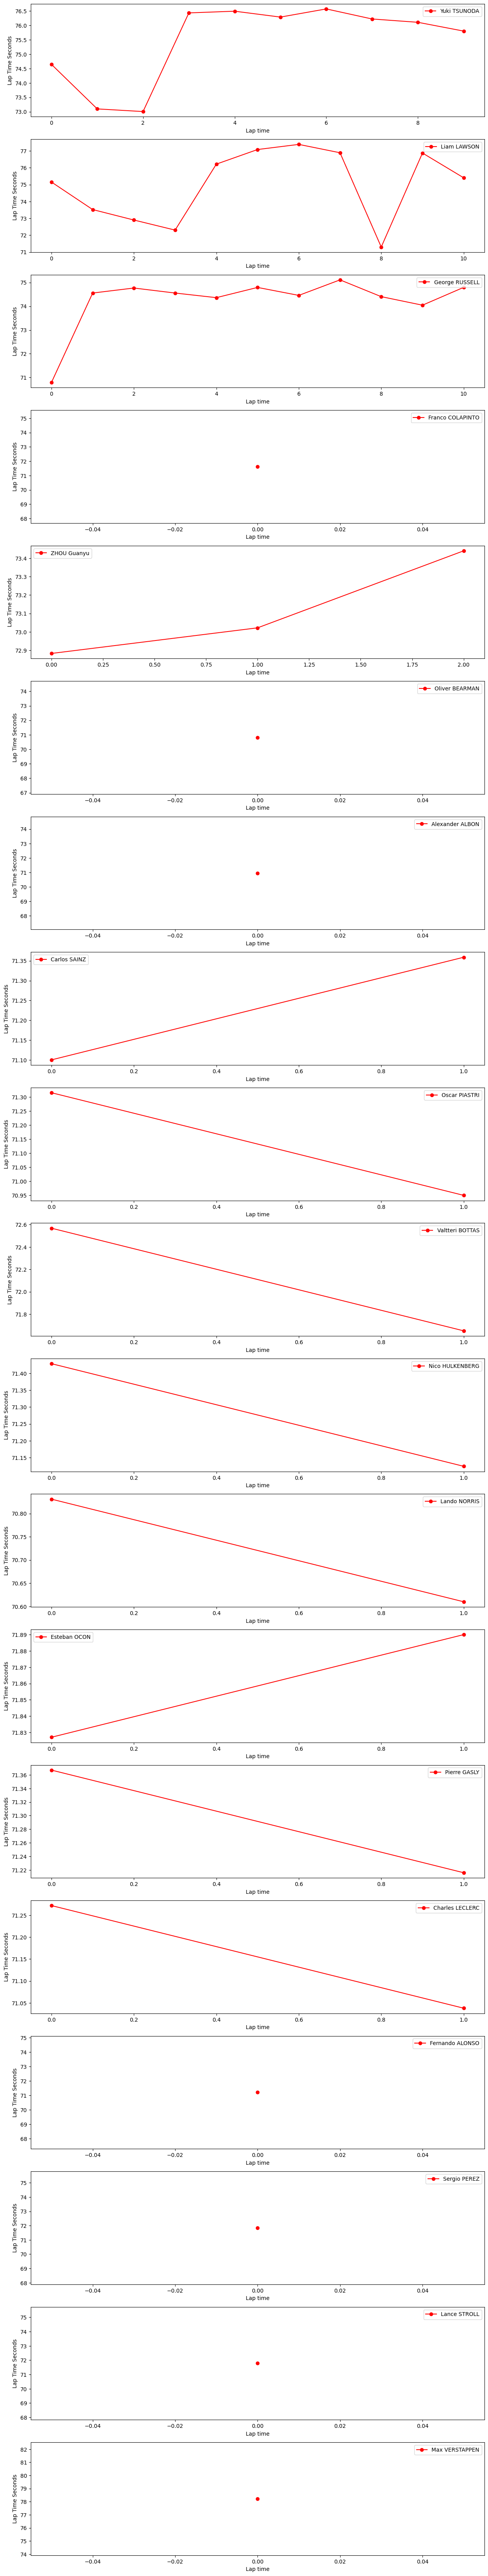

In [67]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",80)

### Hard tyres

In [68]:
#libraryDataF1.obtain_data_tyres(jointables2,"HARD",99)

### Speed trap

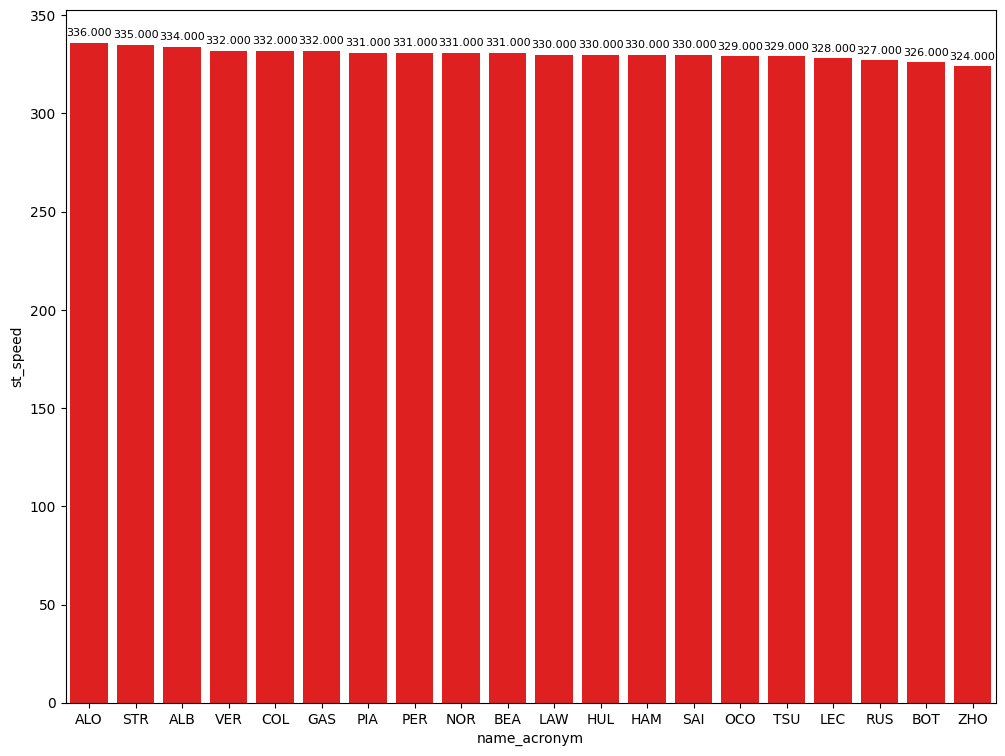

In [69]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

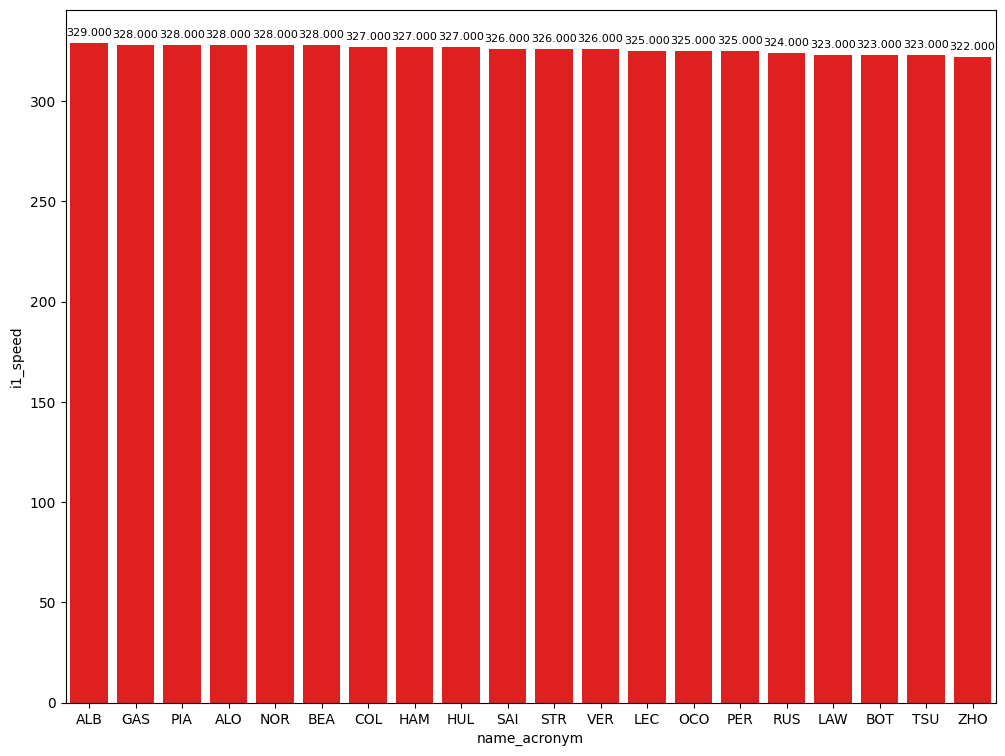

In [70]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

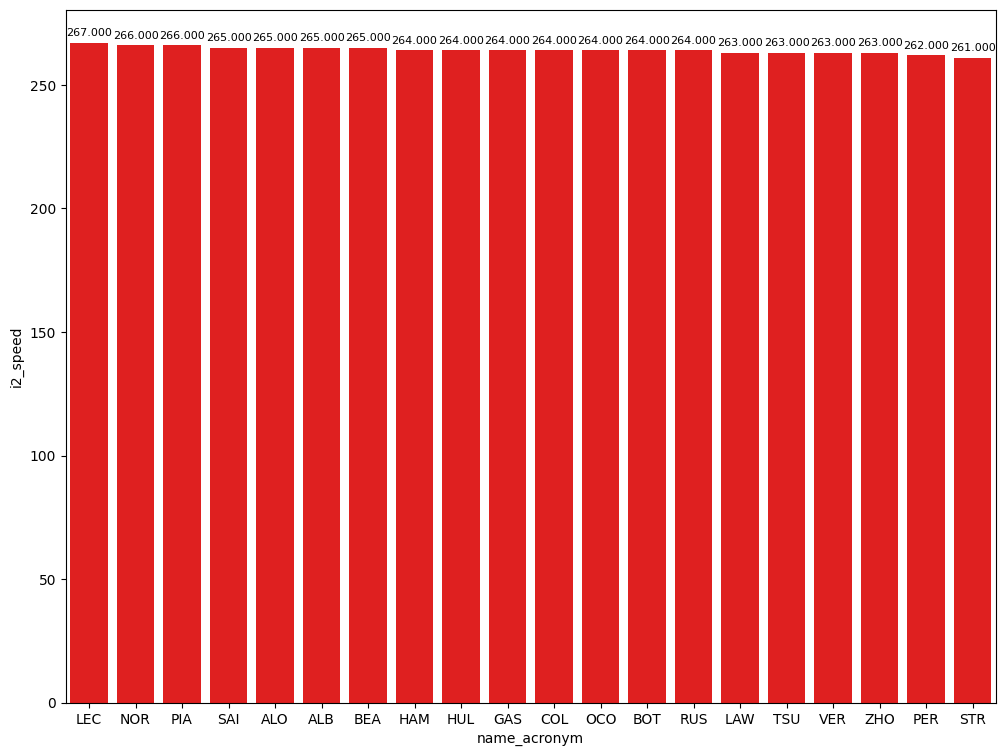

In [71]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [72]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
24,Fernando ALONSO,HARD,46.773,52.645,18.372,117.790
434,Liam LAWSON,MEDIUM,18.412,36.493,16.396,71.301
508,Lando NORRIS,SOFT,18.046,36.194,16.370,70.610


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [73]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


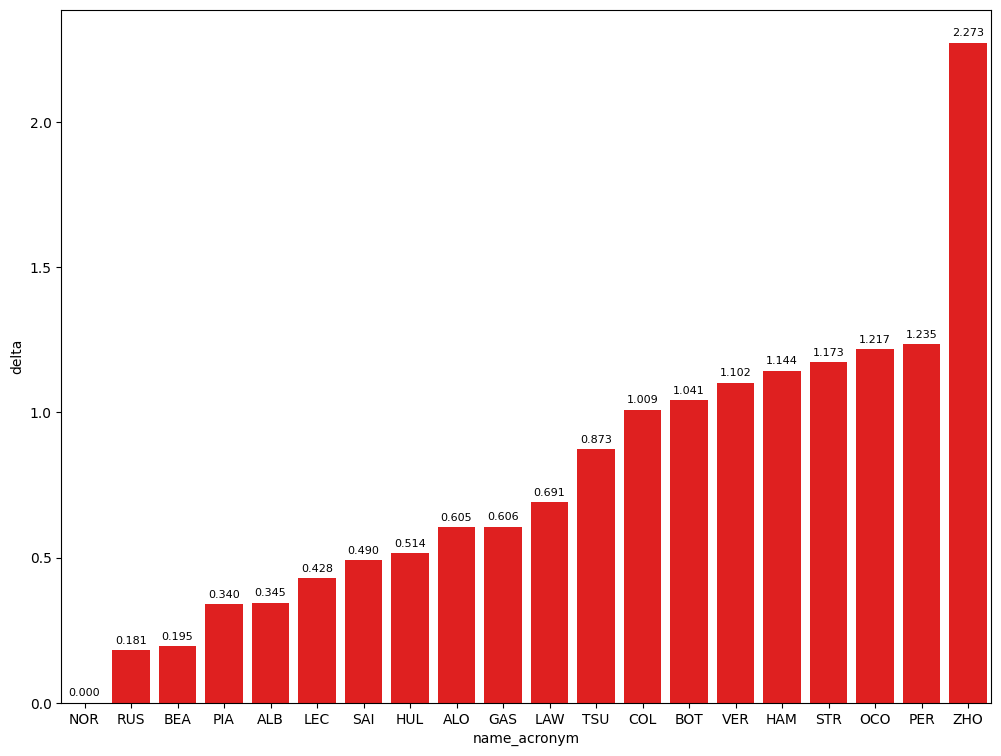

In [74]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. Also, each sector will be commented. As we can see in the free practice, these data  are not very representative due to the changing conditions.


In [75]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
508,18.046,Lando NORRIS,SOFT,70.610,27
424,18.145,Alexander ALBON,SOFT,70.955,22
487,18.154,Max VERSTAPPEN,SOFT,78.221,27
519,18.164,Nico HULKENBERG,SOFT,71.124,24
504,18.210,Charles LECLERC,SOFT,71.038,28
453,18.255,Fernando ALONSO,SOFT,71.215,22
526,18.276,Carlos SAINZ,SOFT,112.766,29
490,18.289,Oscar PIASTRI,SOFT,70.950,27
476,18.315,Yuki TSUNODA,MEDIUM,71.483,21
484,18.321,Lance STROLL,SOFT,71.783,25


In [76]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
330,36.023,George RUSSELL,SOFT,70.791,10
420,36.143,Oliver BEARMAN,SOFT,70.805,24
508,36.194,Lando NORRIS,SOFT,70.610,27
487,36.235,Max VERSTAPPEN,SOFT,78.221,27
490,36.242,Oscar PIASTRI,SOFT,70.950,27
425,36.314,Carlos SAINZ,SOFT,71.100,24
514,36.425,Pierre GASLY,SOFT,71.216,25
519,36.447,Nico HULKENBERG,SOFT,71.124,24
452,36.459,Charles LECLERC,SOFT,71.272,25
433,36.493,Liam LAWSON,SOFT,71.301,20


In [77]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
420,16.176,Oliver BEARMAN,SOFT,70.805,24
504,16.238,Charles LECLERC,SOFT,71.038,28
424,16.238,Alexander ALBON,SOFT,70.955,22
453,16.246,Fernando ALONSO,SOFT,71.215,22
447,16.305,Lando NORRIS,SOFT,70.831,24
437,16.339,Oscar PIASTRI,SOFT,71.315,24
514,16.367,Pierre GASLY,SOFT,71.216,25
433,16.396,Liam LAWSON,SOFT,71.301,20
425,16.402,Carlos SAINZ,SOFT,71.100,24
330,16.440,George RUSSELL,SOFT,70.791,10


### Mean pace with the different compound used on the session

In [78]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 74 and lap_duration <=77.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
MEDIUM,75.260302
SOFT,75.574040


### Long runs

In [117]:
MINIMUN_SECONDS = 74.7
MAXIMUM_SECONDS = 77.5

#### Red Bull Racing

In [118]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1249,9626,1,11,1,4,MEDIUM,0
4,1249,9626,1,1,1,6,MEDIUM,0
23,1249,9626,2,11,5,7,MEDIUM,3
28,1249,9626,2,1,7,10,MEDIUM,5
31,1249,9626,3,11,8,12,MEDIUM,6
46,1249,9626,3,1,11,26,MEDIUM,9
54,1249,9626,4,11,13,23,MEDIUM,11
79,1249,9626,5,11,24,26,SOFT,0
91,1249,9626,4,1,27,28,SOFT,0
93,1249,9626,6,11,27,29,MEDIUM,22


In [119]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
201,Max VERSTAPPEN,MEDIUM,2024-11-01T14:56:27.197000+00:00,11,19.395,39.158,17.253,75.806
211,Max VERSTAPPEN,MEDIUM,2024-11-01T14:57:43.082000+00:00,12,19.333,39.033,17.408,75.774
222,Max VERSTAPPEN,MEDIUM,2024-11-01T14:58:58.755000+00:00,13,19.332,39.244,17.249,75.825
233,Max VERSTAPPEN,MEDIUM,2024-11-01T15:00:14.675000+00:00,14,19.433,39.085,17.285,75.803
246,Max VERSTAPPEN,MEDIUM,2024-11-01T15:01:30.463000+00:00,15,19.388,39.168,17.368,75.924
261,Max VERSTAPPEN,MEDIUM,2024-11-01T15:02:46.302000+00:00,16,19.299,39.284,17.382,75.965
278,Max VERSTAPPEN,MEDIUM,2024-11-01T15:04:02.356000+00:00,17,19.344,39.304,17.424,76.072
294,Max VERSTAPPEN,MEDIUM,2024-11-01T15:05:18.346000+00:00,18,19.364,38.923,17.222,75.509
311,Max VERSTAPPEN,MEDIUM,2024-11-01T15:06:33.964000+00:00,19,19.279,38.807,17.072,75.158
329,Max VERSTAPPEN,MEDIUM,2024-11-01T15:07:49.064000+00:00,20,19.053,39.246,17.450,75.749


In [120]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
139,Sergio PEREZ,MEDIUM,2024-11-01T14:43:02.392000+00:00,8,18.465,36.923,22.025,77.413
249,Sergio PEREZ,MEDIUM,2024-11-01T15:01:52.156000+00:00,13,19.348,38.340,17.422,75.110
264,Sergio PEREZ,MEDIUM,2024-11-01T15:03:07.285000+00:00,14,19.258,38.519,17.523,75.300
282,Sergio PEREZ,MEDIUM,2024-11-01T15:04:22.557000+00:00,15,19.346,38.807,17.493,75.646
299,Sergio PEREZ,MEDIUM,2024-11-01T15:05:38.252000+00:00,16,19.270,39.143,17.376,75.789
315,Sergio PEREZ,MEDIUM,2024-11-01T15:06:54.028000+00:00,17,19.340,38.660,17.198,75.198
333,Sergio PEREZ,MEDIUM,2024-11-01T15:08:09.135000+00:00,18,19.226,38.995,17.347,75.568
362,Sergio PEREZ,MEDIUM,2024-11-01T15:10:43.470000+00:00,20,19.460,38.457,17.099,75.016
374,Sergio PEREZ,MEDIUM,2024-11-01T15:11:58.470000+00:00,21,19.119,38.576,17.299,74.994


#### Ferrari

In [121]:
stintInformation.query('driver_number == 16 or driver_number == 55')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
10,1249,9626,1,16,1,8,MEDIUM,0
15,1249,9626,1,55,1,9,MEDIUM,0
34,1249,9626,2,16,9,13,MEDIUM,7
41,1249,9626,2,55,10,13,MEDIUM,8
58,1249,9626,3,16,14,22,MEDIUM,12
60,1249,9626,3,55,14,23,MEDIUM,12
77,1249,9626,4,16,23,32,SOFT,0
83,1249,9626,4,55,24,26,SOFT,0
97,1249,9626,5,55,27,31,SOFT,3


In [122]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration


In [123]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
29,Carlos SAINZ,MEDIUM,2024-11-01T14:33:12.263000+00:00,2,19.400,38.870,17.156,75.426
400,Carlos SAINZ,MEDIUM,2024-11-01T15:16:20.987000+00:00,22,19.019,37.492,20.833,77.344


#### Mercedes

In [124]:
stintInformation.query('driver_number == 44 or driver_number == 63')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
16,1249,9626,1,63,1,9,MEDIUM,0
17,1249,9626,1,44,1,10,MEDIUM,0
40,1249,9626,2,63,10,12,SOFT,0
44,1249,9626,2,44,11,16,MEDIUM,9
57,1249,9626,3,63,13,25,SOFT,3
61,1249,9626,3,44,17,31,MEDIUM,0


In [125]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
398,Lewis HAMILTON,MEDIUM,2024-11-01T15:15:24.753000+00:00,17,19.499,38.802,17.061,75.362
401,Lewis HAMILTON,MEDIUM,2024-11-01T15:16:40.065000+00:00,18,19.433,38.344,17.074,74.851
407,Lewis HAMILTON,MEDIUM,2024-11-01T15:19:09.272000+00:00,20,19.159,39.518,17.230,75.907
427,Lewis HAMILTON,MEDIUM,2024-11-01T15:21:39.649000+00:00,22,19.144,38.630,17.659,75.433
454,Lewis HAMILTON,MEDIUM,2024-11-01T15:24:09.513000+00:00,24,19.169,38.455,17.128,74.752
470,Lewis HAMILTON,MEDIUM,2024-11-01T15:25:24.293000+00:00,25,19.095,38.626,17.132,74.853
480,Lewis HAMILTON,MEDIUM,2024-11-01T15:26:39.042000+00:00,26,19.223,38.359,17.121,74.703


In [126]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
413,George RUSSELL,SOFT,2024-11-01T15:19:55.418000+00:00,14,19.362,38.469,16.935,74.766
451,George RUSSELL,SOFT,2024-11-01T15:23:39.094000+00:00,17,19.275,38.628,16.888,74.791
477,George RUSSELL,SOFT,2024-11-01T15:26:08.369000+00:00,19,19.186,38.683,17.240,75.109
520,George RUSSELL,SOFT,2024-11-01T15:29:51.996000+00:00,22,19.093,38.593,17.108,74.794


#### McLaren

In [127]:
stintInformation.query('driver_number == 81 or driver_number == 4')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
11,1249,9626,1,81,1,8,MEDIUM,0
12,1249,9626,1,4,1,9,MEDIUM,0
33,1249,9626,2,81,9,11,MEDIUM,7
42,1249,9626,2,4,10,19,MEDIUM,8
51,1249,9626,3,81,12,23,MEDIUM,10
65,1249,9626,3,4,20,23,MEDIUM,18
78,1249,9626,4,4,24,26,SOFT,0
84,1249,9626,4,81,24,26,SOFT,0
95,1249,9626,5,4,27,30,SOFT,3
98,1249,9626,5,81,27,31,SOFT,0


In [128]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
363,Lando NORRIS,MEDIUM,2024-11-01T15:10:44.109000+00:00,20,19.469,38.451,16.829,74.749


In [129]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
114,Oscar PIASTRI,MEDIUM,2024-11-01T14:40:26.185000+00:00,7,18.713,37.467,20.626,76.806
266,Oscar PIASTRI,MEDIUM,2024-11-01T15:03:17.787000+00:00,14,19.815,38.668,17.017,75.500
285,Oscar PIASTRI,MEDIUM,2024-11-01T15:04:33.182000+00:00,15,19.309,38.801,17.033,75.143
301,Oscar PIASTRI,MEDIUM,2024-11-01T15:05:48.409000+00:00,16,19.393,39.035,17.080,75.508
317,Oscar PIASTRI,MEDIUM,2024-11-01T15:07:03.929000+00:00,17,19.375,38.992,17.066,75.433
335,Oscar PIASTRI,MEDIUM,2024-11-01T15:08:19.393000+00:00,18,19.491,39.036,17.089,75.616
351,Oscar PIASTRI,MEDIUM,2024-11-01T15:09:34.871000+00:00,19,19.449,38.893,17.119,75.461
365,Oscar PIASTRI,MEDIUM,2024-11-01T15:10:50.462000+00:00,20,19.124,39.052,16.888,75.064


#### Aston Martin

In [130]:
stintInformation.query('driver_number == 18 or driver_number == 14')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1249,9626,1,14,1,2,HARD,0
1,1249,9626,1,18,1,2,HARD,0
20,1249,9626,2,14,3,5,MEDIUM,0
21,1249,9626,2,18,3,5,MEDIUM,0
24,1249,9626,3,14,6,9,MEDIUM,3
25,1249,9626,3,18,6,10,MEDIUM,3
43,1249,9626,4,14,10,21,MEDIUM,7
45,1249,9626,4,18,11,22,MEDIUM,8
71,1249,9626,5,14,22,23,SOFT,0
74,1249,9626,5,18,23,27,SOFT,0


In [131]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration


In [132]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
43,Lance STROLL,MEDIUM,2024-11-01T14:34:14.982000+00:00,3,19.345,37.978,17.766,75.089


#### RB

In [133]:
stintInformation.query('driver_number == 30 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
13,1249,9626,1,22,1,9,SOFT,0
14,1249,9626,1,30,1,9,SOFT,0
36,1249,9626,2,22,10,11,SOFT,8
37,1249,9626,2,30,10,12,SOFT,8
48,1249,9626,3,22,12,20,SOFT,10
52,1249,9626,3,30,13,18,SOFT,0
62,1249,9626,4,30,19,20,SOFT,17
64,1249,9626,5,30,20,22,MEDIUM,0
67,1249,9626,4,22,21,23,MEDIUM,0
75,1249,9626,6,30,23,27,SOFT,18


In [134]:
libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
54,Liam LAWSON,SOFT,2024-11-01T14:34:59.408000+00:00,2,19.309,38.726,17.117,75.152
218,Liam LAWSON,SOFT,2024-11-01T14:58:29.287000+00:00,13,19.721,39.181,17.311,76.213
228,Liam LAWSON,SOFT,2024-11-01T14:59:45.493000+00:00,14,19.693,39.911,17.474,77.078
241,Liam LAWSON,SOFT,2024-11-01T15:01:02.607000+00:00,15,19.917,39.895,17.570,77.382
253,Liam LAWSON,SOFT,2024-11-01T15:02:19.914000+00:00,16,19.775,39.812,17.300,76.887
494,Liam LAWSON,SOFT,2024-11-01T15:27:35.668000+00:00,23,20.263,39.306,17.302,76.871
505,Liam LAWSON,SOFT,2024-11-01T15:28:52.616000+00:00,24,19.471,38.933,16.999,75.403


In [135]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
220,Yuki TSUNODA,SOFT,2024-11-01T14:58:54.374000+00:00,12,19.618,39.524,17.287,76.429
231,Yuki TSUNODA,SOFT,2024-11-01T15:00:10.816000+00:00,13,19.488,39.706,17.294,76.488
245,Yuki TSUNODA,SOFT,2024-11-01T15:01:27.266000+00:00,14,19.549,39.400,17.335,76.284
260,Yuki TSUNODA,SOFT,2024-11-01T15:02:43.629000+00:00,15,19.508,39.716,17.343,76.567
277,Yuki TSUNODA,SOFT,2024-11-01T15:04:00.062000+00:00,16,19.475,39.498,17.245,76.218
293,Yuki TSUNODA,SOFT,2024-11-01T15:05:16.251000+00:00,17,19.531,39.334,17.238,76.103
310,Yuki TSUNODA,SOFT,2024-11-01T15:06:32.387000+00:00,18,19.332,39.251,17.215,75.798


#### Haas

In [136]:
stintInformation.query('driver_number == 50 or driver_number == 27')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
5,1249,9626,1,27,1,6,MEDIUM,0
7,1249,9626,1,50,1,6,MEDIUM,0
27,1249,9626,2,50,7,9,MEDIUM,5
29,1249,9626,2,27,7,12,MEDIUM,5
39,1249,9626,3,50,10,12,MEDIUM,8
53,1249,9626,3,27,13,20,MEDIUM,0
56,1249,9626,4,50,13,23,MEDIUM,11
68,1249,9626,4,27,21,23,SOFT,0
82,1249,9626,5,50,24,26,SOFT,0
86,1249,9626,5,27,24,27,SOFT,3


In [137]:
libraryDataF1.getinfolongruns(jointables2,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration


In [138]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
42,Nico HULKENBERG,MEDIUM,2024-11-01T14:34:09.331000+00:00,2,19.271,38.660,17.108,75.039
273,Nico HULKENBERG,MEDIUM,2024-11-01T15:03:52.927000+00:00,16,19.457,38.637,17.114,75.208
290,Nico HULKENBERG,MEDIUM,2024-11-01T15:05:08.188000+00:00,17,19.198,38.492,17.220,74.910
308,Nico HULKENBERG,MEDIUM,2024-11-01T15:06:23.062000+00:00,18,19.270,38.726,17.135,75.131


#### Alpine

In [139]:
stintInformation.query('driver_number == 31 or driver_number == 10')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
9,1249,9626,1,10,1,8,MEDIUM,0
19,1249,9626,1,31,1,11,MEDIUM,0
35,1249,9626,2,10,9,21,MEDIUM,0
50,1249,9626,2,31,12,20,MEDIUM,0
69,1249,9626,3,31,21,23,SOFT,0
72,1249,9626,3,10,22,24,SOFT,0
87,1249,9626,4,31,24,27,SOFT,3
89,1249,9626,4,10,25,28,SOFT,3


In [140]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
307,Esteban OCON,MEDIUM,2024-11-01T15:06:21.528000+00:00,14,19.127,39.173,16.983,75.283


In [141]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration


#### Williams

In [142]:
stintInformation.query('driver_number == 43 or driver_number == 23')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
2,1249,9626,1,23,1,2,MEDIUM,0
6,1249,9626,1,43,1,6,MEDIUM,0
22,1249,9626,2,23,3,8,MEDIUM,0
26,1249,9626,2,43,7,9,MEDIUM,5
32,1249,9626,3,23,9,11,MEDIUM,7
38,1249,9626,3,43,10,12,MEDIUM,8
49,1249,9626,4,23,12,20,MEDIUM,10
55,1249,9626,4,43,13,23,MEDIUM,11
66,1249,9626,5,23,21,20,MEDIUM,0
70,1249,9626,6,23,21,24,SOFT,0


In [143]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
229,Alexander ALBON,MEDIUM,2024-11-01T14:59:51.907000+00:00,12,19.430,38.417,17.119,74.966
242,Alexander ALBON,MEDIUM,2024-11-01T15:01:06.766000+00:00,13,19.401,38.582,16.984,74.967
254,Alexander ALBON,MEDIUM,2024-11-01T15:02:21.769000+00:00,14,19.386,38.875,16.911,75.172
269,Alexander ALBON,MEDIUM,2024-11-01T15:03:36.909000+00:00,15,19.324,38.499,16.993,74.816
304,Alexander ALBON,MEDIUM,2024-11-01T15:06:06.020000+00:00,17,19.199,38.534,17.062,74.795


In [144]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
213,Franco COLAPINTO,MEDIUM,2024-11-01T14:57:58.105000+00:00,13,19.552,39.330,17.309,76.191
223,Franco COLAPINTO,MEDIUM,2024-11-01T14:59:14.251000+00:00,14,19.345,39.064,17.130,75.539
234,Franco COLAPINTO,MEDIUM,2024-11-01T15:00:29.850000+00:00,15,19.287,39.163,17.168,75.618
247,Franco COLAPINTO,MEDIUM,2024-11-01T15:01:45.440000+00:00,16,19.429,39.436,17.387,76.252
263,Franco COLAPINTO,MEDIUM,2024-11-01T15:03:01.708000+00:00,17,19.389,40.074,17.412,76.875
281,Franco COLAPINTO,MEDIUM,2024-11-01T15:04:18.489000+00:00,18,19.730,39.936,17.311,76.977
298,Franco COLAPINTO,MEDIUM,2024-11-01T15:05:35.615000+00:00,19,19.513,40.012,17.396,76.921
314,Franco COLAPINTO,MEDIUM,2024-11-01T15:06:52.469000+00:00,20,19.304,39.477,17.041,75.822
332,Franco COLAPINTO,MEDIUM,2024-11-01T15:08:08.308000+00:00,21,19.121,38.863,17.155,75.139


#### Kick Sauber

In [145]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
8,1249,9626,1,77,1,6,MEDIUM,0
18,1249,9626,1,24,1,11,MEDIUM,0
30,1249,9626,2,77,7,13,MEDIUM,5
47,1249,9626,2,24,12,19,MEDIUM,10
59,1249,9626,3,77,14,22,MEDIUM,12
63,1249,9626,3,24,20,22,SOFT,0
73,1249,9626,4,77,23,25,SOFT,0
76,1249,9626,4,24,23,28,SOFT,0
90,1249,9626,5,77,26,30,SOFT,3


In [146]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
32,ZHOU Guanyu,MEDIUM,2024-11-01T14:33:18.851000+00:00,3,19.371,39.471,17.009,75.851
288,ZHOU Guanyu,MEDIUM,2024-11-01T15:05:03.003000+00:00,12,20.414,39.489,17.250,77.153
306,ZHOU Guanyu,MEDIUM,2024-11-01T15:06:20.146000+00:00,13,19.606,39.620,17.509,76.735
325,ZHOU Guanyu,MEDIUM,2024-11-01T15:07:36.862000+00:00,14,20.134,39.952,17.392,77.478
343,ZHOU Guanyu,MEDIUM,2024-11-01T15:08:54.406000+00:00,15,19.781,39.465,17.336,76.582
358,ZHOU Guanyu,MEDIUM,2024-11-01T15:10:10.956000+00:00,16,19.743,40.164,17.331,77.238
371,ZHOU Guanyu,MEDIUM,2024-11-01T15:11:28.149000+00:00,17,19.544,39.072,17.116,75.732


In [147]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
13,Valtteri BOTTAS,MEDIUM,2024-11-01T14:31:32.664000+00:00,2,19.658,38.914,17.045,75.617
243,Valtteri BOTTAS,MEDIUM,2024-11-01T15:01:11.627000+00:00,14,19.388,38.462,17.267,75.117
255,Valtteri BOTTAS,MEDIUM,2024-11-01T15:02:26.774000+00:00,15,19.420,39.045,17.406,75.871
270,Valtteri BOTTAS,MEDIUM,2024-11-01T15:03:42.600000+00:00,16,19.600,39.039,17.391,76.030
287,Valtteri BOTTAS,MEDIUM,2024-11-01T15:04:58.563000+00:00,17,19.725,39.001,17.378,76.104
305,Valtteri BOTTAS,MEDIUM,2024-11-01T15:06:14.802000+00:00,18,19.410,38.857,17.339,75.606
323,Valtteri BOTTAS,MEDIUM,2024-11-01T15:07:30.370000+00:00,19,19.463,38.817,17.271,75.551
341,Valtteri BOTTAS,MEDIUM,2024-11-01T15:08:45.870000+00:00,20,19.413,38.889,17.241,75.543


#### Long runs mean for each driver

In [148]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [149]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
1,Lando NORRIS,MEDIUM,74.749000,19.469000,38.451000,16.829000
14,George RUSSELL,SOFT,74.865000,19.229000,38.593250,17.042750
5,Alexander ALBON,MEDIUM,74.943200,19.348000,38.581400,17.013800
7,Nico HULKENBERG,MEDIUM,75.072000,19.299000,38.628750,17.144250
3,Lance STROLL,MEDIUM,75.089000,19.345000,37.978000,17.766000
11,Lewis HAMILTON,MEDIUM,75.123000,19.246000,38.676286,17.200714
9,Esteban OCON,MEDIUM,75.283000,19.127000,39.173000,16.983000
12,Oliver BEARMAN,MEDIUM,75.499500,19.485833,38.819833,17.193833
2,Sergio PEREZ,MEDIUM,75.559333,19.203556,38.491111,17.864667
16,Oscar PIASTRI,MEDIUM,75.566375,19.333625,38.743000,17.489750


##### Sorted by sector 1


In [150]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
9,Esteban OCON,MEDIUM,75.283000,19.127000,39.173000,16.983000
2,Sergio PEREZ,MEDIUM,75.559333,19.203556,38.491111,17.864667
13,Carlos SAINZ,MEDIUM,76.385000,19.209500,38.181000,18.994500
14,George RUSSELL,SOFT,74.865000,19.229000,38.593250,17.042750
11,Lewis HAMILTON,MEDIUM,75.123000,19.246000,38.676286,17.200714
7,Nico HULKENBERG,MEDIUM,75.072000,19.299000,38.628750,17.144250
0,Max VERSTAPPEN,MEDIUM,75.678364,19.327455,39.059636,17.291273
16,Oscar PIASTRI,MEDIUM,75.566375,19.333625,38.743000,17.489750
3,Lance STROLL,MEDIUM,75.089000,19.345000,37.978000,17.766000
5,Alexander ALBON,MEDIUM,74.943200,19.348000,38.581400,17.013800


##### Sorted by sector 2


In [151]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
3,Lance STROLL,MEDIUM,75.089000,19.345000,37.978000,17.766000
13,Carlos SAINZ,MEDIUM,76.385000,19.209500,38.181000,18.994500
1,Lando NORRIS,MEDIUM,74.749000,19.469000,38.451000,16.829000
2,Sergio PEREZ,MEDIUM,75.559333,19.203556,38.491111,17.864667
5,Alexander ALBON,MEDIUM,74.943200,19.348000,38.581400,17.013800
14,George RUSSELL,SOFT,74.865000,19.229000,38.593250,17.042750
7,Nico HULKENBERG,MEDIUM,75.072000,19.299000,38.628750,17.144250
11,Lewis HAMILTON,MEDIUM,75.123000,19.246000,38.676286,17.200714
16,Oscar PIASTRI,MEDIUM,75.566375,19.333625,38.743000,17.489750
12,Oliver BEARMAN,MEDIUM,75.499500,19.485833,38.819833,17.193833


##### Sorted by sector 3

In [152]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
1,Lando NORRIS,MEDIUM,74.749000,19.469000,38.451000,16.829000
9,Esteban OCON,MEDIUM,75.283000,19.127000,39.173000,16.983000
5,Alexander ALBON,MEDIUM,74.943200,19.348000,38.581400,17.013800
14,George RUSSELL,SOFT,74.865000,19.229000,38.593250,17.042750
7,Nico HULKENBERG,MEDIUM,75.072000,19.299000,38.628750,17.144250
12,Oliver BEARMAN,MEDIUM,75.499500,19.485833,38.819833,17.193833
11,Lewis HAMILTON,MEDIUM,75.123000,19.246000,38.676286,17.200714
10,Franco COLAPINTO,MEDIUM,76.148222,19.407778,39.483889,17.256556
6,ZHOU Guanyu,MEDIUM,76.681286,19.799000,39.604714,17.277571
4,Yuki TSUNODA,SOFT,76.269571,19.500143,39.489857,17.279571


## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [164]:
libraryDataF1.obtain_information('race_control',session_key=9631)

,session_key,meeting_key,date,category,flag,lap_number,message,driver_number,scope,sector
0,9631,1249,2024-11-01T18:15:32+00:00,Other,None,None,RISK OF RAIN FOR F1 SPRINT QUALIFYING IS 20%,None,None,None
1,9631,1249,2024-11-01T18:15:49+00:00,Other,None,None,PINK HEAD PADDING MATERIAL MUST BE USED,None,None,None
2,9631,1249,2024-11-01T18:30:00+00:00,Flag,GREEN,None,GREEN LIGHT - PIT EXIT OPEN,None,Track,None
3,9631,1249,2024-11-01T18:36:18+00:00,Other,None,None,CAR 43 (COL) TIME 1:14.226 DELETED - TRACK LIM...,None,None,None
4,9631,1249,2024-11-01T18:42:00+00:00,Flag,CHEQUERED,None,CHEQUERED FLAG,None,Track,None
5,9631,1249,2024-11-01T18:42:08+00:00,Other,None,None,FIRST CAR TO TAKE THE FLAG - CAR 14 (ALO),None,None,None
6,9631,1249,2024-11-01T18:45:28+00:00,Other,None,None,FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 18 (...,None,None,None
7,9631,1249,2024-11-01T18:45:42+00:00,Other,None,None,FIA STEWARDS: SQ1 INCIDENT INVOLVING CARS 18 (...,None,None,None
8,9631,1249,2024-11-01T18:49:00+00:00,Flag,GREEN,None,GREEN LIGHT - PIT EXIT OPEN,None,Track,None
9,9631,1249,2024-11-01T18:59:00+00:00,Flag,CHEQUERED,None,CHEQUERED FLAG,None,Track,None


### Obtain setup

In [165]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9631)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9631)
drivers = libraryDataF1.obtain_information('drivers',session_key=9631)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted ,within the 107%, were deleted from dataset in order to obtain only the valid laps for the analysis.

In [166]:
laptimes_deleted = [74.226,69.879]
driver_number_lap_deleted = [43,50]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [167]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
209,1249,9631,81,327,267,323.0,2024-11-01T19:12:25.014000+00:00,68.899,False,17.825,34.909,16.165,"[2048, 2049, 2051, 2049, 2051, 2051, 2048]","[2048, 2048, 2049, 2048, 2049, 2049, 2049, 2048]","[2048, 2048, 2048, 2064, 2064]",15


The fastest lap is 68.899 seconds (1.08.899= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (73.72 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [168]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 73.72")
competitiveLaps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
13,1249,9631,16,323,265,322.0,2024-11-01T18:31:28.428000+00:00,71.654,False,18.585,36.593,16.476,"[2049, 2049, 2049, 2049, 2051, 2049, 2049]","[2051, 2049, 2049, 2049, 2049, 2049, 2051, 2051]","[2048, 2048, 2048, 2048, 2048]",2
15,1249,9631,55,324,264,324.0,2024-11-01T18:31:35.002000+00:00,72.257,False,18.473,37.097,16.687,"[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2048, 2048, 2048, 2048]",2
17,1249,9631,18,325,265,327.0,2024-11-01T18:31:45.228000+00:00,72.163,False,18.573,36.941,16.649,"[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2051, 2051, 2049, 2049, 2051]","[2048, 2048, 2048, 2064, 2064]",2
20,1249,9631,24,322,261,319.0,2024-11-01T18:31:52.210000+00:00,72.978,False,18.978,37.398,16.602,"[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2048, 2048, 2064, 2064]",2
21,1249,9631,77,324,258,325.0,2024-11-01T18:31:57.609000+00:00,71.979,False,18.796,36.630,16.553,"[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2051, 2049, 2049]","[2048, 2048, 2048, 2064, 2064]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1249,9631,55,326,267,322.0,2024-11-01T19:11:55.495000+00:00,69.257,False,17.983,35.079,16.195,"[2049, 2049, 2049, 2051, 2049, 2049, 2049]","[2049, 2049, 2051, 2049, 2049, 2051, 2051, 2049]","[2048, 2048, 2048, 2064, 2064]",14
208,1249,9631,16,325,269,323.0,2024-11-01T19:12:04.284000+00:00,69.153,False,18.033,35.059,16.061,"[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2051]","[2048, 2048, 2048, 2064, 2064]",17
209,1249,9631,81,327,267,323.0,2024-11-01T19:12:25.014000+00:00,68.899,False,17.825,34.909,16.165,"[2048, 2049, 2051, 2049, 2051, 2051, 2048]","[2048, 2048, 2049, 2048, 2049, 2049, 2049, 2048]","[2048, 2048, 2048, 2064, 2064]",15
215,1249,9631,1,328,265,325.0,2024-11-01T19:13:11.217000+00:00,69.219,False,17.857,35.160,16.202,"[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2051, 2049, 2049, 2049, 2049]","[2048, 2048, 2048, 2064, 2064]",11


In [169]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

,driver_number,fastest_lap,delta,st_speed,i1_speed,i2_speed,session_key,meeting_key,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym
15,81,68.899,0.000,323.0,327,265,9631,1249,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,FF8000,McLaren,PIA
12,4,68.928,0.029,325.0,327,266,9631,1249,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,FF8000,McLaren,NOR
0,16,69.153,0.254,322.0,323,265,9631,1249,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,E80020,Ferrari,LEC
18,1,69.219,0.320,324.0,326,264,9631,1249,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671C6,Red Bull Racing,VER
1,55,69.257,0.358,322.0,324,264,9631,1249,C SAINZ,ESP,Carlos,Carlos SAINZ,https://media.formula1.com/d_driver_fallback_i...,Sainz,E80020,Ferrari,SAI
10,63,69.443,0.544,322.0,326,266,9631,1249,G RUSSELL,GBR,George,George RUSSELL,https://media.formula1.com/d_driver_fallback_i...,Russell,27F4D2,Mercedes,RUS
5,10,69.610,0.711,324.0,325,264,9631,1249,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,0093cc,Alpine,GAS
17,50,69.629,0.730,324.0,328,253,9631,1249,O BEARMAN,None,None,Oliver BEARMAN,None,None,None,None,BEA
13,30,69.827,0.928,322.0,324,264,9631,1249,L LAWSON,None,None,Liam LAWSON,None,None,None,None,LAW
9,23,69.844,0.945,325.0,327,265,9631,1249,A ALBON,THA,Alexander,Alexander ALBON,https://media.formula1.com/d_driver_fallback_i...,Albon,64C4FF,Williams,ALB


#### Best lap per driver compared with the best lap of the session

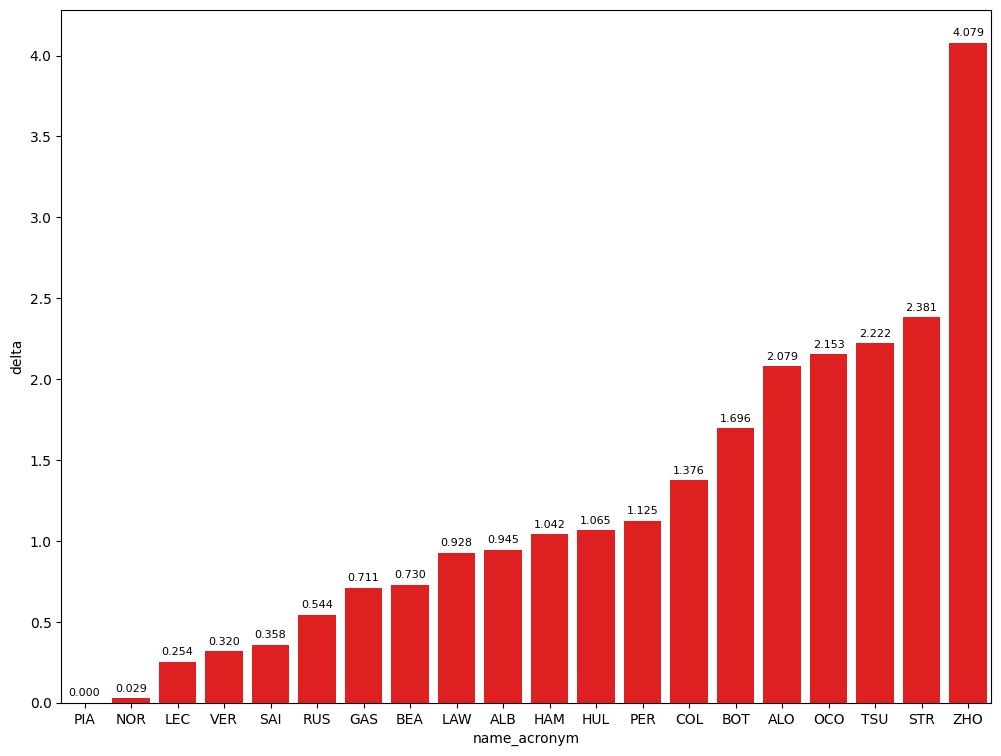

In [170]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [171]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [172]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-11-01T18:42:00+00:00'"
maximumDateQ2 = "date_start <'2024-11-01T19:06:00+00:00' and date_start >='2024-11-01T18:42:00+00:00'"
maximumDateQ3 = "date_start >'2024-11-01T19:06:00+00:00'"

### Sprint Qualyfing 1

In [173]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
44,1249,9631,4,328,267,329.0,2024-11-01T18:41:43.441000+00:00,69.477,False,18.031,...,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,FF8000,McLaren,NOR,True
52,1249,9631,81,329,265,327.0,2024-11-01T18:34:08.264000+00:00,70.265,False,18.209,...,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,FF8000,McLaren,PIA,True
31,1249,9631,23,328,268,328.0,2024-11-01T18:41:52.055000+00:00,70.366,False,18.121,...,A ALBON,THA,Alexander,Alexander ALBON,https://media.formula1.com/d_driver_fallback_i...,Albon,64C4FF,Williams,ALB,True
2,1249,9631,16,325,269,325.0,2024-11-01T18:40:45.015000+00:00,70.388,False,18.133,...,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,E80020,Ferrari,LEC,True
28,1249,9631,11,326,265,326.0,2024-11-01T18:40:06.540000+00:00,70.392,False,18.302,...,S PEREZ,MEX,Sergio,Sergio PEREZ,https://media.formula1.com/d_driver_fallback_i...,Perez,3671C6,Red Bull Racing,PER,True
63,1249,9631,1,326,266,324.0,2024-11-01T18:39:22.579000+00:00,70.409,False,18.069,...,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671C6,Red Bull Racing,VER,True
60,1249,9631,50,328,265,328.0,2024-11-01T18:41:11.218000+00:00,70.442,False,18.238,...,O BEARMAN,None,None,Oliver BEARMAN,None,None,None,None,BEA,True
57,1249,9631,27,328,264,318.0,2024-11-01T18:34:16.944000+00:00,70.466,False,18.372,...,N HULKENBERG,GER,Nico,Nico HULKENBERG,https://media.formula1.com/d_driver_fallback_i...,Hulkenberg,B6BABD,Haas F1 Team,HUL,True
66,1249,9631,43,328,267,328.0,2024-11-01T18:41:57.796000+00:00,70.470,False,18.273,...,F COLAPINTO,None,None,Franco COLAPINTO,None,None,None,None,COL,True
35,1249,9631,63,328,268,323.0,2024-11-01T18:39:32.911000+00:00,70.479,False,18.233,...,G RUSSELL,GBR,George,George RUSSELL,https://media.formula1.com/d_driver_fallback_i...,Russell,27F4D2,Mercedes,RUS,True


##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [174]:
#Reference
P15 = q1Data[14:15]
P15

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
15,1249,9631,77,325,264,323.0,2024-11-01T18:41:34.318000+00:00,70.861,False,18.406,...,V BOTTAS,FIN,Valtteri,Valtteri BOTTAS,https://media.formula1.com/d_driver_fallback_i...,Bottas,52E252,Kick Sauber,BOT,True


In [175]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Valtteri BOTTAS Sector 1:  18.406 Sector 2:  35.926 Sector 3:  16.529


In [176]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,14,0.117,-0.249,0.416,-0.050,ALO
1,31,0.191,0.005,0.241,-0.055,OCO
2,22,0.260,-0.096,0.378,-0.022,TSU
3,18,0.419,-0.188,0.724,-0.117,STR
4,24,2.117,0.572,1.472,0.073,ZHO


### Best sector per driver

In [177]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
NOR,18.031
VER,18.069
ALB,18.121
LEC,18.133
ALO,18.157
HAM,18.165
GAS,18.191
PIA,18.209
STR,18.218


In [178]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
NOR,35.283
PER,35.671
PIA,35.761
LEC,35.762
HUL,35.784
COL,35.788
RUS,35.824
SAI,35.866
LAW,35.882


In [179]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
NOR,16.163
PIA,16.295
BEA,16.303
HUL,16.310
VER,16.317
ALB,16.319
GAS,16.349
LAW,16.359
SAI,16.405


### Sprint Qualyfing 2

In [180]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
45,1249,9631,4,328,268,326.0,2024-11-01T18:51:07.007000+00:00,69.063,False,17.994,...,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,FF8000,McLaren,NOR,True
54,1249,9631,81,327,266,325.0,2024-11-01T18:58:19.249000+00:00,69.239,False,18.072,...,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,FF8000,McLaren,PIA,True
4,1249,9631,16,325,269,323.0,2024-11-01T18:58:28.238000+00:00,69.248,False,18.100,...,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,E80020,Ferrari,LEC,True
64,1249,9631,1,326,266,324.0,2024-11-01T18:53:11.724000+00:00,69.489,False,17.969,...,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671C6,Red Bull Racing,VER,True
9,1249,9631,55,326,268,325.0,2024-11-01T18:51:21.144000+00:00,69.500,False,18.051,...,C SAINZ,ESP,Carlos,Carlos SAINZ,https://media.formula1.com/d_driver_fallback_i...,Sainz,E80020,Ferrari,SAI,True
21,1249,9631,10,325,267,325.0,2024-11-01T18:58:09.091000+00:00,69.610,False,18.100,...,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,0093cc,Alpine,GAS,True
61,1249,9631,50,329,267,326.0,2024-11-01T18:57:32.961000+00:00,69.629,False,18.236,...,O BEARMAN,None,None,Oliver BEARMAN,None,None,None,None,BEA,True
36,1249,9631,63,326,268,322.0,2024-11-01T18:50:18.220000+00:00,69.683,False,18.126,...,G RUSSELL,GBR,George,George RUSSELL,https://media.formula1.com/d_driver_fallback_i...,Russell,27F4D2,Mercedes,RUS,True
48,1249,9631,30,324,265,324.0,2024-11-01T18:57:52.480000+00:00,69.827,False,18.233,...,L LAWSON,None,None,Liam LAWSON,None,None,None,None,LAW,True
32,1249,9631,23,328,269,327.0,2024-11-01T18:53:58.616000+00:00,69.844,False,18.063,...,A ALBON,THA,Alexander,Alexander ALBON,https://media.formula1.com/d_driver_fallback_i...,Albon,64C4FF,Williams,ALB,True


##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [181]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Alexander ALBON Sector 1:  18.063 Sector 2:  35.536 Sector 3:  16.245


In [182]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,44,0.097,0.031,0.091,-0.025,HAM
1,27,0.120,0.106,-0.024,0.038,HUL
2,11,0.180,-0.001,0.074,0.107,PER
3,43,0.431,0.194,0.082,0.155,COL
4,77,0.751,0.393,0.265,0.093,BOT


### Best sector per driver

In [183]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
VER,17.969
NOR,17.994
SAI,18.051
PER,18.062
ALB,18.063
PIA,18.072
HAM,18.094
GAS,18.100
LEC,18.100


In [184]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
PIA,34.941
NOR,34.991
LEC,35.040
SAI,35.128
BEA,35.294
VER,35.299
GAS,35.323
LAW,35.353
RUS,35.364


In [185]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
NOR,16.078
BEA,16.099
LEC,16.108
GAS,16.187
RUS,16.193
HAM,16.220
VER,16.221
PIA,16.226
LAW,16.241


### Sprint Qualyfing 3

In [186]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

,meeting_key_x,session_key_x,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,...,broadcast_name,country_code,first_name,full_name,headshot_url,last_name,team_colour,team_name,name_acronym,isFastestLap
56,1249,9631,81,327,267,323.0,2024-11-01T19:12:25.014000+00:00,68.899,False,17.825,...,O PIASTRI,AUS,Oscar,Oscar PIASTRI,https://media.formula1.com/d_driver_fallback_i...,Piastri,FF8000,McLaren,PIA,True
46,1249,9631,4,327,269,325.0,2024-11-01T19:07:39.565000+00:00,68.928,False,17.793,...,L NORRIS,GBR,Lando,Lando NORRIS,https://media.formula1.com/d_driver_fallback_i...,Norris,FF8000,McLaren,NOR,True
5,1249,9631,16,325,269,323.0,2024-11-01T19:12:04.284000+00:00,69.153,False,18.033,...,C LECLERC,MON,Charles,Charles LECLERC,https://media.formula1.com/d_driver_fallback_i...,Leclerc,E80020,Ferrari,LEC,True
65,1249,9631,1,328,265,325.0,2024-11-01T19:13:11.217000+00:00,69.219,False,17.857,...,M VERSTAPPEN,NED,Max,Max VERSTAPPEN,https://media.formula1.com/d_driver_fallback_i...,Verstappen,3671C6,Red Bull Racing,VER,True
10,1249,9631,55,326,267,322.0,2024-11-01T19:11:55.495000+00:00,69.257,False,17.983,...,C SAINZ,ESP,Carlos,Carlos SAINZ,https://media.formula1.com/d_driver_fallback_i...,Sainz,E80020,Ferrari,SAI,True
38,1249,9631,63,327,269,325.0,2024-11-01T19:13:19.108000+00:00,69.443,False,17.970,...,G RUSSELL,GBR,George,George RUSSELL,https://media.formula1.com/d_driver_fallback_i...,Russell,27F4D2,Mercedes,RUS,True
22,1249,9631,10,325,266,324.0,2024-11-01T19:11:26.838000+00:00,69.622,False,18.002,...,P GASLY,FRA,Pierre,Pierre GASLY,https://media.formula1.com/d_driver_fallback_i...,Gasly,0093cc,Alpine,GAS,True
49,1249,9631,30,324,265,322.0,2024-11-01T19:11:47.311000+00:00,69.941,False,18.281,...,L LAWSON,None,None,Liam LAWSON,None,None,None,None,LAW,True
33,1249,9631,23,327,267,325.0,2024-11-01T19:08:24.783000+00:00,70.078,False,18.161,...,A ALBON,THA,Alexander,Alexander ALBON,https://media.formula1.com/d_driver_fallback_i...,Albon,64C4FF,Williams,ALB,True


In [187]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Oscar PIASTRI Sector 1:  17.825 Sector 2:  34.909 Sector 3:  16.165


##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [188]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,4,0.029,-0.032,0.097,-0.036,NOR
1,16,0.254,0.208,0.150,-0.104,LEC
2,1,0.320,0.032,0.251,0.037,VER
3,55,0.358,0.158,0.170,0.030,SAI
4,63,0.544,0.145,0.327,0.072,RUS
5,10,0.723,0.177,0.513,0.033,GAS
6,30,1.042,0.456,0.574,0.012,LAW
7,23,1.179,0.336,0.734,0.109,ALB


### Best sector per driver

In [189]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
NOR,17.793
PIA,17.825
VER,17.857
RUS,17.970
SAI,17.983
GAS,18.002
LEC,18.033
ALB,18.161
LAW,18.281


In [190]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
PIA,34.909
NOR,35.006
LEC,35.059
SAI,35.079
VER,35.160
RUS,35.236
GAS,35.422
LAW,35.483
ALB,35.643


In [191]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
LEC,16.061
NOR,16.129
PIA,16.165
LAW,16.177
SAI,16.195
GAS,16.198
VER,16.202
RUS,16.237
ALB,16.274


### Best sector in the session

In [192]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

,duration_sector_1
name_acronym,
NOR,17.793
PIA,17.825
VER,17.857
RUS,17.970
SAI,17.983
GAS,18.002
LEC,18.033
PER,18.062
ALB,18.063


In [193]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

,duration_sector_2
name_acronym,
PIA,34.909
NOR,34.991
LEC,35.040
SAI,35.079
VER,35.160
RUS,35.236
BEA,35.294
GAS,35.323
LAW,35.353


In [194]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

,duration_sector_3
name_acronym,
LEC,16.061
NOR,16.078
BEA,16.099
PIA,16.165
LAW,16.177
GAS,16.187
RUS,16.193
SAI,16.195
VER,16.202


## Predictions

In [153]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9626)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9626)
drivers = libraryDataF1.obtain_information('drivers',session_key=9626)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
# practice = libraryDataF1.obtain_information('laps',session_key=9600)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 3
# practice = libraryDataF1.obtain_information('laps',session_key=9591)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9591)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9591)

# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [154]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice1],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:320: RuntimeWarning: Mean of empty slice.
  sector1= dataset.query("team_name == @team and duration_sector_1 <=  @threshold_sector1").duration_sector_1.values.mean()
/home/frank/.local/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:321: RuntimeWarning: Mean of empty slice.
  sector2 = dataset.query("team_name == @team and duration_sector_2 <=  @threshold_sector2").duration_sector_2.values.mean()
/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:322: RuntimeWarning: Mean of empty slice.
  sector3 = dataset.query("team_name == @team and duration_sector_3 <=  @threshold_sector3").duration_sector_3.values.mean()
/home/frank/Escritorio/F1_notebooks/F1_24/F1_library/libraryF1dataNotebook.py:320: RuntimeWarni

,team,qualy_lap_time,mean_sector_1,mean_sector_2,mean_sector_3
1,McLaren,71.346452,18.207333,36.677286,16.461833
4,Ferrari,71.518125,18.257000,36.775125,16.486000
8,Haas F1 Team,71.720167,18.242500,36.918000,16.559667
2,Alpine,71.735857,18.433667,36.767857,16.534333
0,Red Bull Racing,71.871738,18.302667,36.824571,16.744500
6,Williams,71.876417,18.229500,37.114250,16.532667
3,Aston Martin,71.957238,18.308667,37.127571,16.521000
10,Mercedes,72.028024,18.365333,37.051857,16.610833
5,RB,72.409500,18.457500,37.271667,16.680333
7,Kick Sauber,72.737310,18.707000,37.317143,16.713167


### Race prediction

In [158]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice1,drivers,74,78)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

,mean_lap_duration,mean_sector_1,mean_sector_2,mean_sector_3
team,,,,
Aston Martin,74.553500,19.210875,38.300500,17.042125
Mercedes,74.710836,19.192973,38.496068,17.021795
Williams,74.775143,19.320429,38.472714,16.982000
McLaren,75.018444,19.275778,38.590389,17.152278
Haas F1 Team,75.072000,19.299000,38.628750,17.144250
Alpine,75.249500,19.697250,38.620250,16.932000
Ferrari,75.294875,19.190500,38.052750,18.051625
Red Bull Racing,75.496095,19.247563,38.697127,17.551405
Kick Sauber,75.901488,19.559750,39.112012,17.229725


## Sprint

In [3]:
race = libraryDataF1.obtain_information('laps',session_key=9635)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9635)
drivers = libraryDataF1.obtain_information('drivers',session_key=9635)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
jointables

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1249,9635,1,313.0,252.0,220.0,None,NaN,False,NaN,38.254,16.432,"[2064, 2051, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2051, 2051]",1,MEDIUM,VER,Max VERSTAPPEN,Red Bull Racing
1,1249,9635,4,306.0,247.0,213.0,None,NaN,False,NaN,37.306,16.292,"[2064, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2051, 2049, 2051, 2049, 2049, 2051, 2049]","[2049, 2048, 2049, 2049, 0]",1,MEDIUM,NOR,Lando NORRIS,McLaren
2,1249,9635,10,313.0,251.0,228.0,None,NaN,False,NaN,39.545,16.607,"[2064, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049]",1,MEDIUM,GAS,Pierre GASLY,Alpine
3,1249,9635,11,307.0,244.0,222.0,None,NaN,False,NaN,39.939,17.181,"[2048, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049]",1,MEDIUM,PER,Sergio PEREZ,Red Bull Racing
4,1249,9635,14,299.0,249.0,NaN,None,NaN,False,NaN,38.864,16.853,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049]",1,MEDIUM,ALO,Fernando ALONSO,Aston Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,1249,9635,50,317.0,209.0,257.0,2024-11-02T14:32:15.427000+00:00,76.164,False,20.049,39.171,16.944,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0]",24,MEDIUM,BEA,Oliver BEARMAN,Haas F1 Team
472,1249,9635,55,294.0,258.0,252.0,2024-11-02T14:31:47.754000+00:00,75.594,False,21.761,37.167,16.666,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 0, 0, 0]",24,MEDIUM,SAI,Carlos SAINZ,Ferrari
473,1249,9635,63,306.0,260.0,191.0,2024-11-02T14:31:50.978000+00:00,77.601,False,23.310,37.799,16.492,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0]",24,MEDIUM,RUS,George RUSSELL,Mercedes
474,1249,9635,77,307.0,256.0,308.0,2024-11-02T14:32:26.589000+00:00,72.698,False,19.040,36.962,16.696,"[None, 2048, 2048, 2048, 2049, 2048, 2048]","[2049, 2048, 2049, 2048, 2049, 2049, 2049, 2049]","[0, 0, 0, 0, 0]",24,MEDIUM,BOT,Valtteri BOTTAS,Kick Sauber


### Pace per compound

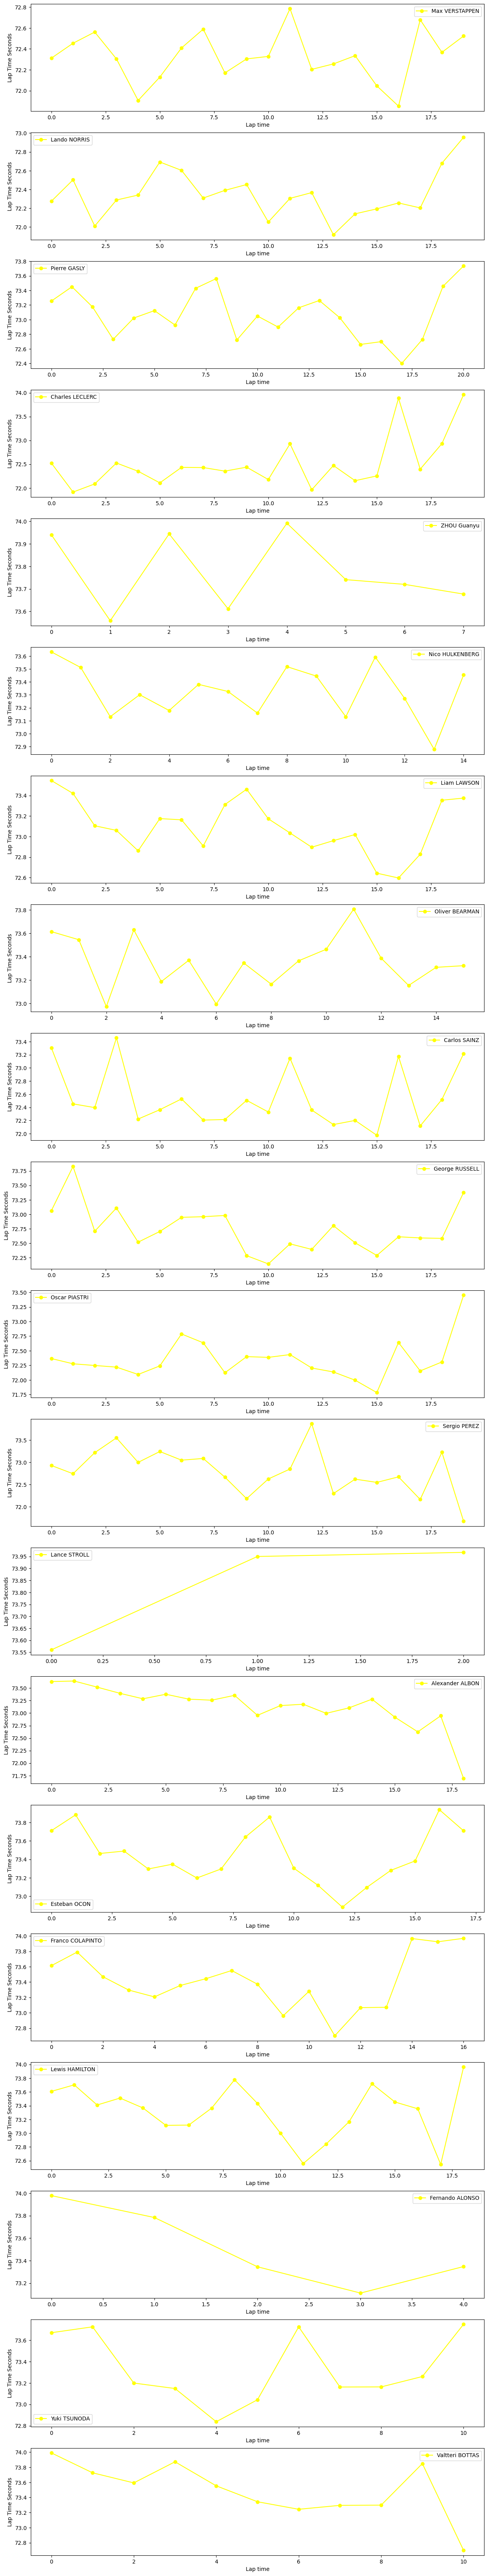

In [5]:
libraryDataF1.obtain_data_tyres(jointables,"MEDIUM",74)

### Top speed captured in the speed trap

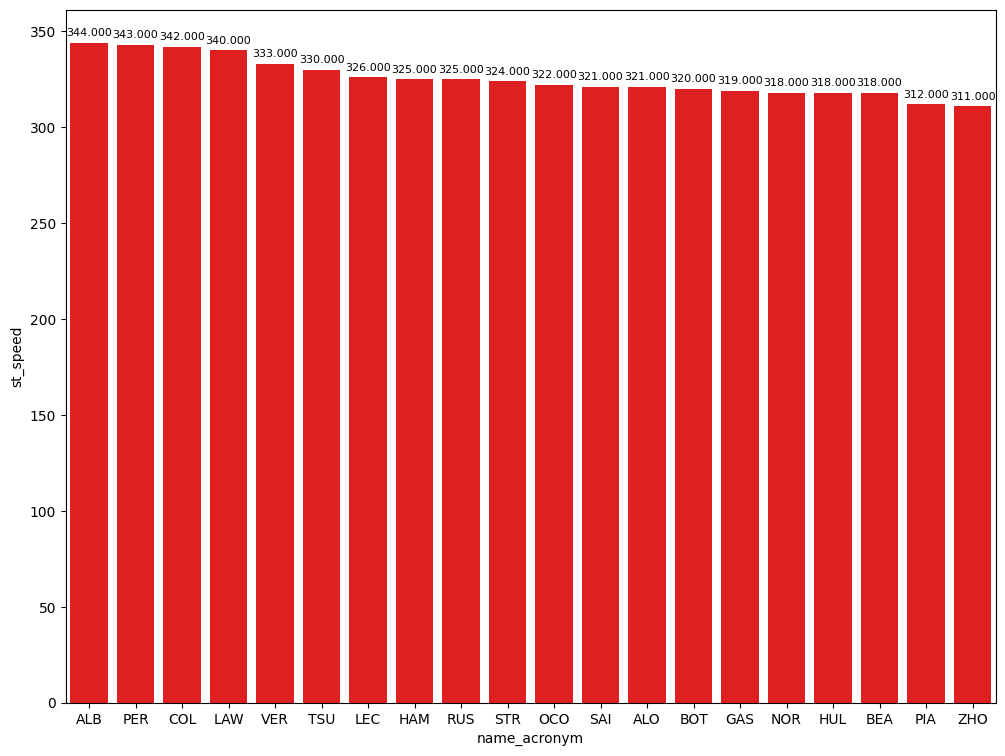

In [6]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

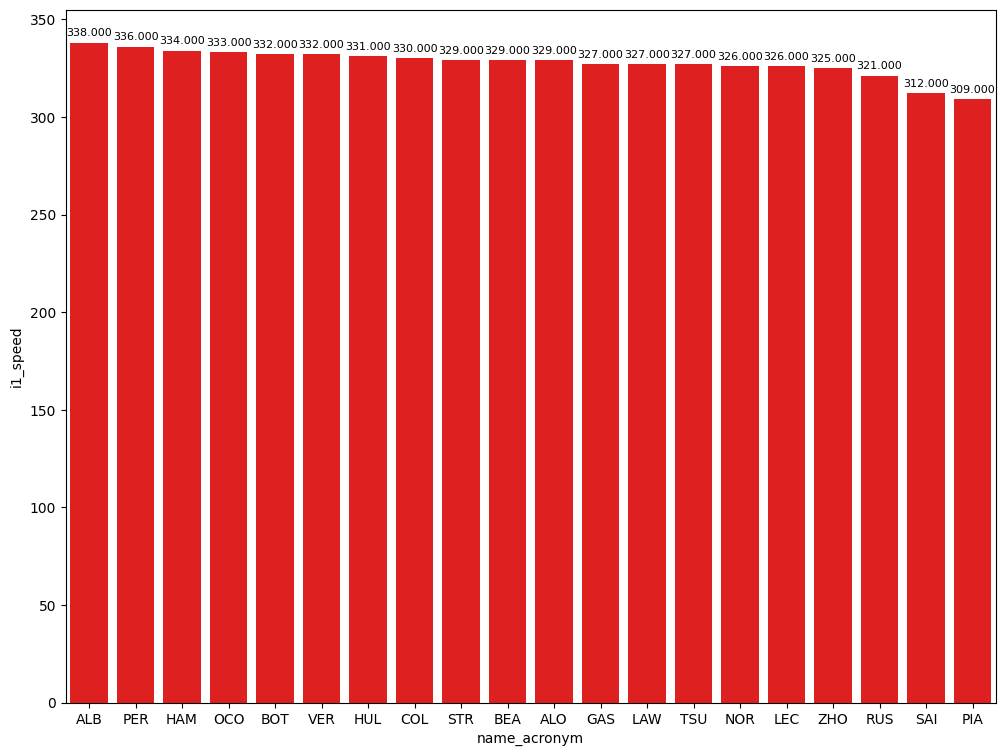

In [7]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

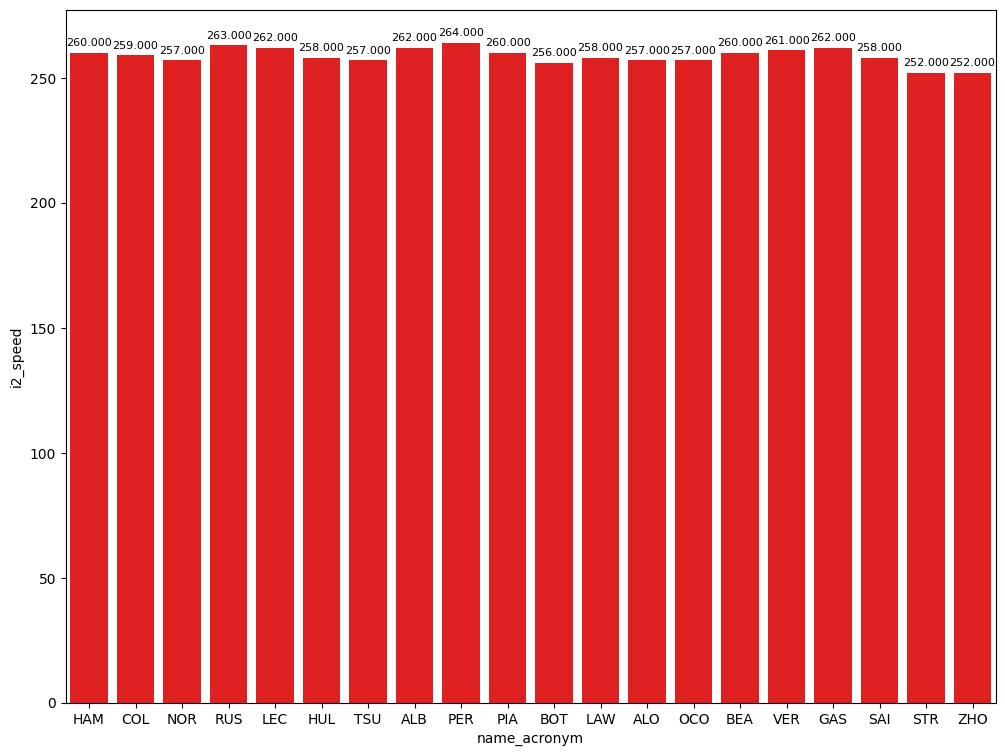

In [8]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [9]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
team_name,
McLaren,72.357448
Red Bull Racing,72.536676
Ferrari,72.584034
Mercedes,73.094379
RB,73.224773
Alpine,73.226633
Williams,73.238667
Haas F1 Team,73.367880
Kick Sauber,73.599312


### Race pace per teams

In [10]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

,duration_sector_1
team_name,
Red Bull Racing,18.815811
McLaren,18.838379
Williams,18.909727
Mercedes,18.914448
Ferrari,18.962310
Alpine,18.966967
Haas F1 Team,19.048320
RB,19.063318
Aston Martin,19.091000


In [11]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

,duration_sector_2
team_name,
McLaren,37.113897
Ferrari,37.132586
Red Bull Racing,37.307703
RB,37.597682
Alpine,37.664333
Kick Sauber,37.706500
Mercedes,37.736759
Williams,37.826485
Haas F1 Team,37.830880


In [12]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=74").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

,duration_sector_3
team_name,
McLaren,16.405172
Red Bull Racing,16.413162
Mercedes,16.443172
Haas F1 Team,16.488680
Ferrari,16.489138
Williams,16.502455
RB,16.563773
Alpine,16.595333
Aston Martin,16.669833


### Race pace

In [13]:
MINIMUN_SECONDS = 70
MAXIMUM_SECONDS = 74

#### Red Bull Racing

In [14]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
1,1249,9635,1,1,1,25,MEDIUM,3
4,1249,9635,1,11,1,25,MEDIUM,4


In [15]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
20,Max VERSTAPPEN,MEDIUM,2024-11-02T14:04:28.786000+00:00,2,18.902,37.261,16.148,72.311
40,Max VERSTAPPEN,MEDIUM,2024-11-02T14:05:41.189000+00:00,3,18.813,37.327,16.314,72.454
60,Max VERSTAPPEN,MEDIUM,2024-11-02T14:06:53.613000+00:00,4,18.555,37.462,16.544,72.561
80,Max VERSTAPPEN,MEDIUM,2024-11-02T14:08:06.063000+00:00,5,18.726,37.101,16.477,72.304
100,Max VERSTAPPEN,MEDIUM,2024-11-02T14:09:18.336000+00:00,6,18.579,36.969,16.358,71.906
120,Max VERSTAPPEN,MEDIUM,2024-11-02T14:10:30.236000+00:00,7,18.486,37.161,16.483,72.130
140,Max VERSTAPPEN,MEDIUM,2024-11-02T14:11:42.427000+00:00,8,18.526,37.511,16.372,72.409
160,Max VERSTAPPEN,MEDIUM,2024-11-02T14:12:54.815000+00:00,9,18.649,37.498,16.442,72.589
180,Max VERSTAPPEN,MEDIUM,2024-11-02T14:14:07.497000+00:00,10,18.482,37.368,16.320,72.170
200,Max VERSTAPPEN,MEDIUM,2024-11-02T14:15:19.632000+00:00,11,18.519,37.477,16.308,72.304


In [16]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
43,Sergio PEREZ,MEDIUM,2024-11-02T14:05:48.041000+00:00,3,18.824,37.585,16.520,72.929
63,Sergio PEREZ,MEDIUM,2024-11-02T14:07:00.900000+00:00,4,18.704,37.554,16.485,72.743
83,Sergio PEREZ,MEDIUM,2024-11-02T14:08:13.721000+00:00,5,18.759,37.913,16.544,73.216
103,Sergio PEREZ,MEDIUM,2024-11-02T14:09:26.961000+00:00,6,18.835,38.049,16.664,73.548
123,Sergio PEREZ,MEDIUM,2024-11-02T14:10:40.496000+00:00,7,18.671,37.823,16.504,72.998
143,Sergio PEREZ,MEDIUM,2024-11-02T14:11:53.520000+00:00,8,18.816,37.835,16.591,73.242
163,Sergio PEREZ,MEDIUM,2024-11-02T14:13:06.699000+00:00,9,18.936,37.716,16.396,73.048
183,Sergio PEREZ,MEDIUM,2024-11-02T14:14:19.710000+00:00,10,18.835,37.785,16.466,73.086
203,Sergio PEREZ,MEDIUM,2024-11-02T14:15:32.923000+00:00,11,18.868,37.253,16.545,72.666
223,Sergio PEREZ,MEDIUM,2024-11-02T14:16:45.507000+00:00,12,18.850,36.967,16.367,72.184


#### Ferrari

In [17]:
stintInformation.query('driver_number == 16 or driver_number == 55')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
6,1249,9635,1,16,1,25,MEDIUM,6
16,1249,9635,1,55,1,25,MEDIUM,3


In [18]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
25,Charles LECLERC,MEDIUM,2024-11-02T14:04:28.358000+00:00,2,18.938,37.274,16.311,72.523
45,Charles LECLERC,MEDIUM,2024-11-02T14:05:40.801000+00:00,3,18.879,36.844,16.191,71.914
65,Charles LECLERC,MEDIUM,2024-11-02T14:06:52.647000+00:00,4,18.554,37.277,16.254,72.085
85,Charles LECLERC,MEDIUM,2024-11-02T14:08:04.811000+00:00,5,18.628,37.450,16.447,72.525
105,Charles LECLERC,MEDIUM,2024-11-02T14:09:17.469000+00:00,6,18.801,37.126,16.424,72.351
125,Charles LECLERC,MEDIUM,2024-11-02T14:10:29.768000+00:00,7,18.712,36.962,16.433,72.107
145,Charles LECLERC,MEDIUM,2024-11-02T14:11:41.746000+00:00,8,18.848,37.197,16.388,72.433
165,Charles LECLERC,MEDIUM,2024-11-02T14:12:54.380000+00:00,9,18.755,37.364,16.310,72.429
185,Charles LECLERC,MEDIUM,2024-11-02T14:14:06.727000+00:00,10,18.590,37.442,16.322,72.354
205,Charles LECLERC,MEDIUM,2024-11-02T14:15:19.035000+00:00,11,18.618,37.397,16.422,72.437


In [19]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
36,Carlos SAINZ,MEDIUM,2024-11-02T14:04:29.799000+00:00,2,19.690,37.155,16.462,73.307
56,Carlos SAINZ,MEDIUM,2024-11-02T14:05:43.011000+00:00,3,19.118,36.808,16.527,72.453
76,Carlos SAINZ,MEDIUM,2024-11-02T14:06:55.506000+00:00,4,18.657,37.076,16.663,72.396
96,Carlos SAINZ,MEDIUM,2024-11-02T14:08:07.961000+00:00,5,19.792,37.051,16.615,73.458
116,Carlos SAINZ,MEDIUM,2024-11-02T14:09:21.458000+00:00,6,18.820,36.843,16.559,72.222
136,Carlos SAINZ,MEDIUM,2024-11-02T14:10:33.579000+00:00,7,18.716,37.028,16.620,72.364
156,Carlos SAINZ,MEDIUM,2024-11-02T14:11:45.896000+00:00,8,18.888,36.956,16.684,72.528
176,Carlos SAINZ,MEDIUM,2024-11-02T14:12:58.451000+00:00,9,18.830,36.852,16.524,72.206
196,Carlos SAINZ,MEDIUM,2024-11-02T14:14:10.652000+00:00,10,18.726,37.005,16.484,72.215
216,Carlos SAINZ,MEDIUM,2024-11-02T14:15:22.844000+00:00,11,18.856,37.135,16.516,72.507


#### McLaren

In [20]:
stintInformation.query('driver_number == 4 or driver_number == 81')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
2,1249,9635,1,4,1,25,MEDIUM,3
19,1249,9635,1,81,1,25,MEDIUM,4


In [21]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
21,Lando NORRIS,MEDIUM,2024-11-02T14:04:27.028000+00:00,2,18.907,37.136,16.231,72.274
41,Lando NORRIS,MEDIUM,2024-11-02T14:05:39.167000+00:00,3,18.815,37.345,16.342,72.502
61,Lando NORRIS,MEDIUM,2024-11-02T14:06:51.835000+00:00,4,18.653,37.162,16.195,72.010
81,Lando NORRIS,MEDIUM,2024-11-02T14:08:03.914000+00:00,5,18.678,37.333,16.276,72.287
101,Lando NORRIS,MEDIUM,2024-11-02T14:09:16.199000+00:00,6,18.787,37.195,16.358,72.340
121,Lando NORRIS,MEDIUM,2024-11-02T14:10:28.479000+00:00,7,18.707,37.446,16.539,72.692
141,Lando NORRIS,MEDIUM,2024-11-02T14:11:41.277000+00:00,8,18.888,37.159,16.556,72.603
161,Lando NORRIS,MEDIUM,2024-11-02T14:12:53.827000+00:00,9,18.869,36.989,16.450,72.308
181,Lando NORRIS,MEDIUM,2024-11-02T14:14:06.123000+00:00,10,18.731,37.194,16.465,72.390
201,Lando NORRIS,MEDIUM,2024-11-02T14:15:18.557000+00:00,11,18.804,37.200,16.448,72.452


In [22]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
39,Oscar PIASTRI,MEDIUM,2024-11-02T14:04:26.490000+00:00,2,18.939,37.068,16.359,72.366
59,Oscar PIASTRI,MEDIUM,2024-11-02T14:05:39.081000+00:00,3,18.930,37.027,16.319,72.276
79,Oscar PIASTRI,MEDIUM,2024-11-02T14:06:51.124000+00:00,4,18.903,37.018,16.326,72.247
99,Oscar PIASTRI,MEDIUM,2024-11-02T14:08:03.471000+00:00,5,18.856,36.873,16.490,72.219
119,Oscar PIASTRI,MEDIUM,2024-11-02T14:09:15.553000+00:00,6,18.908,36.722,16.463,72.093
139,Oscar PIASTRI,MEDIUM,2024-11-02T14:10:27.650000+00:00,7,18.788,36.939,16.513,72.240
159,Oscar PIASTRI,MEDIUM,2024-11-02T14:11:39.931000+00:00,8,18.894,37.214,16.679,72.787
179,Oscar PIASTRI,MEDIUM,2024-11-02T14:12:52.728000+00:00,9,18.874,37.118,16.644,72.636
199,Oscar PIASTRI,MEDIUM,2024-11-02T14:14:05.291000+00:00,10,18.870,36.794,16.458,72.122
219,Oscar PIASTRI,MEDIUM,2024-11-02T14:15:17.484000+00:00,11,18.990,36.901,16.508,72.399


#### Mercedes

In [23]:
stintInformation.query('driver_number == 44 or driver_number == 63')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
14,1249,9635,1,44,1,25,MEDIUM,7
17,1249,9635,1,63,1,25,MEDIUM,6


In [24]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
74,Lewis HAMILTON,MEDIUM,2024-11-02T14:07:03.470000+00:00,4,18.846,38.301,16.461,73.608
94,Lewis HAMILTON,MEDIUM,2024-11-02T14:08:17.075000+00:00,5,18.875,38.417,16.411,73.703
114,Lewis HAMILTON,MEDIUM,2024-11-02T14:09:30.780000+00:00,6,18.618,38.403,16.389,73.410
134,Lewis HAMILTON,MEDIUM,2024-11-02T14:10:44.241000+00:00,7,18.702,38.424,16.385,73.511
154,Lewis HAMILTON,MEDIUM,2024-11-02T14:11:57.635000+00:00,8,18.760,38.162,16.445,73.367
174,Lewis HAMILTON,MEDIUM,2024-11-02T14:13:11.076000+00:00,9,18.586,38.199,16.329,73.114
194,Lewis HAMILTON,MEDIUM,2024-11-02T14:14:24.103000+00:00,10,18.760,38.108,16.250,73.118
214,Lewis HAMILTON,MEDIUM,2024-11-02T14:15:37.273000+00:00,11,18.694,38.288,16.383,73.365
234,Lewis HAMILTON,MEDIUM,2024-11-02T14:16:50.592000+00:00,12,18.916,38.370,16.491,73.777
254,Lewis HAMILTON,MEDIUM,2024-11-02T14:18:04.382000+00:00,13,19.178,37.803,16.452,73.433


In [25]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
37,George RUSSELL,MEDIUM,2024-11-02T14:04:30.546000+00:00,2,19.314,37.407,16.340,73.061
57,George RUSSELL,MEDIUM,2024-11-02T14:05:43.568000+00:00,3,19.721,37.606,16.499,73.826
77,George RUSSELL,MEDIUM,2024-11-02T14:06:57.409000+00:00,4,19.117,37.202,16.388,72.707
97,George RUSSELL,MEDIUM,2024-11-02T14:08:10.119000+00:00,5,18.955,37.581,16.572,73.108
117,George RUSSELL,MEDIUM,2024-11-02T14:09:23.161000+00:00,6,18.881,37.123,16.514,72.518
137,George RUSSELL,MEDIUM,2024-11-02T14:10:35.749000+00:00,7,18.898,37.320,16.485,72.703
157,George RUSSELL,MEDIUM,2024-11-02T14:11:48.338000+00:00,8,18.868,37.453,16.626,72.947
177,George RUSSELL,MEDIUM,2024-11-02T14:13:01.443000+00:00,9,18.878,37.507,16.573,72.958
197,George RUSSELL,MEDIUM,2024-11-02T14:14:14.407000+00:00,10,18.960,37.417,16.602,72.979
217,George RUSSELL,MEDIUM,2024-11-02T14:15:27.377000+00:00,11,18.860,37.030,16.395,72.285


#### Aston Martin

In [26]:
stintInformation.query('driver_number == 14 or driver_number == 18')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
5,1249,9635,1,14,1,25,MEDIUM,6
7,1249,9635,1,18,1,25,MEDIUM,6


In [27]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
104,Fernando ALONSO,MEDIUM,2024-11-02T14:09:34.711000+00:00,6,18.967,38.500,16.511,73.978
264,Fernando ALONSO,MEDIUM,2024-11-02T14:19:30.070000+00:00,14,19.268,37.750,16.765,73.783
284,Fernando ALONSO,MEDIUM,2024-11-02T14:20:43.749000+00:00,15,19.250,37.443,16.652,73.345
304,Fernando ALONSO,MEDIUM,2024-11-02T14:21:57.223000+00:00,16,19.222,37.400,16.489,73.111
324,Fernando ALONSO,MEDIUM,2024-11-02T14:23:10.316000+00:00,17,19.063,37.630,16.654,73.347


In [28]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
46,Lance STROLL,MEDIUM,2024-11-02T14:05:53.259000+00:00,3,19.009,38.032,16.519,73.560
106,Lance STROLL,MEDIUM,2024-11-02T14:09:35.388000+00:00,6,18.894,38.374,16.682,73.950
346,Lance STROLL,MEDIUM,2024-11-02T14:24:29.980000+00:00,18,19.158,37.919,16.890,73.967


#### RB

In [29]:
stintInformation.query('driver_number == 30 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
8,1249,9635,1,22,1,25,MEDIUM,3
11,1249,9635,1,30,1,25,MEDIUM,0


In [30]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
31,Liam LAWSON,MEDIUM,2024-11-02T14:04:31.637000+00:00,2,19.272,37.954,16.320,73.546
51,Liam LAWSON,MEDIUM,2024-11-02T14:05:45.351000+00:00,3,18.925,38.173,16.322,73.420
71,Liam LAWSON,MEDIUM,2024-11-02T14:06:58.722000+00:00,4,18.956,37.769,16.380,73.105
91,Liam LAWSON,MEDIUM,2024-11-02T14:08:11.843000+00:00,5,19.101,37.540,16.419,73.060
111,Liam LAWSON,MEDIUM,2024-11-02T14:09:24.819000+00:00,6,18.780,37.561,16.520,72.861
131,Liam LAWSON,MEDIUM,2024-11-02T14:10:37.769000+00:00,7,18.888,37.777,16.510,73.175
151,Liam LAWSON,MEDIUM,2024-11-02T14:11:50.947000+00:00,8,19.010,37.527,16.626,73.163
171,Liam LAWSON,MEDIUM,2024-11-02T14:13:04.060000+00:00,9,19.106,37.440,16.362,72.908
191,Liam LAWSON,MEDIUM,2024-11-02T14:14:16.936000+00:00,10,18.996,37.864,16.452,73.312
211,Liam LAWSON,MEDIUM,2024-11-02T14:15:30.341000+00:00,11,18.973,37.848,16.640,73.461


In [31]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
107,Yuki TSUNODA,MEDIUM,2024-11-02T14:09:33.937000+00:00,6,18.983,38.149,16.537,73.669
207,Yuki TSUNODA,MEDIUM,2024-11-02T14:15:45.432000+00:00,11,19.056,37.856,16.812,73.724
227,Yuki TSUNODA,MEDIUM,2024-11-02T14:16:59.254000+00:00,12,18.963,37.483,16.753,73.199
247,Yuki TSUNODA,MEDIUM,2024-11-02T14:18:12.413000+00:00,13,19.043,37.367,16.738,73.148
267,Yuki TSUNODA,MEDIUM,2024-11-02T14:19:25.612000+00:00,14,18.935,37.182,16.721,72.838
287,Yuki TSUNODA,MEDIUM,2024-11-02T14:20:38.367000+00:00,15,18.929,37.387,16.727,73.043
307,Yuki TSUNODA,MEDIUM,2024-11-02T14:21:51.434000+00:00,16,19.711,37.375,16.638,73.724
327,Yuki TSUNODA,MEDIUM,2024-11-02T14:23:05.106000+00:00,17,19.074,37.359,16.729,73.162
347,Yuki TSUNODA,MEDIUM,2024-11-02T14:24:18.375000+00:00,18,19.075,37.364,16.724,73.163
367,Yuki TSUNODA,MEDIUM,2024-11-02T14:25:31.559000+00:00,19,19.104,37.477,16.679,73.260


#### Haas F1 Team

In [45]:
stintInformation.query('driver_number == 50 or driver_number == 27')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1249,9635,1,27,1,20,MEDIUM,5
15,1249,9635,1,50,1,25,MEDIUM,6


In [44]:
libraryDataF1.getinfolongruns(jointables,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
35,Oliver BEARMAN,MEDIUM,2024-11-02T14:04:32.646000+00:00,2,18.821,38.488,16.306,73.615
55,Oliver BEARMAN,MEDIUM,2024-11-02T14:05:46.281000+00:00,3,19.326,37.935,16.285,73.546
75,Oliver BEARMAN,MEDIUM,2024-11-02T14:06:59.918000+00:00,4,18.847,37.902,16.225,72.974
95,Oliver BEARMAN,MEDIUM,2024-11-02T14:08:12.860000+00:00,5,18.868,38.402,16.360,73.630
115,Oliver BEARMAN,MEDIUM,2024-11-02T14:09:26.482000+00:00,6,18.882,37.896,16.410,73.188
135,Oliver BEARMAN,MEDIUM,2024-11-02T14:10:39.745000+00:00,7,18.880,38.092,16.398,73.370
155,Oliver BEARMAN,MEDIUM,2024-11-02T14:11:53.135000+00:00,8,18.958,37.640,16.398,72.996
175,Oliver BEARMAN,MEDIUM,2024-11-02T14:13:06.096000+00:00,9,19.258,37.484,16.605,73.347
195,Oliver BEARMAN,MEDIUM,2024-11-02T14:14:19.248000+00:00,10,18.978,37.643,16.545,73.166
235,Oliver BEARMAN,MEDIUM,2024-11-02T14:16:46.685000+00:00,12,19.082,37.843,16.441,73.366


In [34]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
30,Nico HULKENBERG,MEDIUM,2024-11-02T14:04:32.134000+00:00,2,19.038,38.256,16.338,73.632
50,Nico HULKENBERG,MEDIUM,2024-11-02T14:05:45.957000+00:00,3,18.848,38.282,16.381,73.511
70,Nico HULKENBERG,MEDIUM,2024-11-02T14:06:59.345000+00:00,4,18.742,38.038,16.351,73.131
90,Nico HULKENBERG,MEDIUM,2024-11-02T14:08:12.545000+00:00,5,18.785,38.061,16.455,73.301
110,Nico HULKENBERG,MEDIUM,2024-11-02T14:09:25.865000+00:00,6,18.736,37.859,16.584,73.179
130,Nico HULKENBERG,MEDIUM,2024-11-02T14:10:38.966000+00:00,7,19.045,37.739,16.597,73.381
150,Nico HULKENBERG,MEDIUM,2024-11-02T14:11:52.429000+00:00,8,19.058,37.532,16.736,73.326
190,Nico HULKENBERG,MEDIUM,2024-11-02T14:14:21.606000+00:00,10,18.982,37.565,16.612,73.159
210,Nico HULKENBERG,MEDIUM,2024-11-02T14:15:34.617000+00:00,11,19.041,37.852,16.625,73.518
230,Nico HULKENBERG,MEDIUM,2024-11-02T14:16:47.964000+00:00,12,19.099,37.744,16.602,73.445


#### Alpine

In [35]:
stintInformation.query('driver_number == 10 or driver_number == 31')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1249,9635,1,10,1,25,MEDIUM,0
12,1249,9635,1,31,1,25,MEDIUM,6


In [36]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
72,Esteban OCON,MEDIUM,2024-11-02T14:07:04.005000+00:00,4,18.875,38.261,16.575,73.711
92,Esteban OCON,MEDIUM,2024-11-02T14:08:17.734000+00:00,5,18.804,38.463,16.616,73.883
112,Esteban OCON,MEDIUM,2024-11-02T14:09:31.609000+00:00,6,18.748,38.136,16.580,73.464
132,Esteban OCON,MEDIUM,2024-11-02T14:10:45.102000+00:00,7,18.789,38.115,16.586,73.490
152,Esteban OCON,MEDIUM,2024-11-02T14:11:58.526000+00:00,8,18.810,37.906,16.580,73.296
172,Esteban OCON,MEDIUM,2024-11-02T14:13:11.814000+00:00,9,18.730,38.047,16.571,73.348
192,Esteban OCON,MEDIUM,2024-11-02T14:14:25.165000+00:00,10,18.936,37.718,16.544,73.198
212,Esteban OCON,MEDIUM,2024-11-02T14:15:38.429000+00:00,11,18.658,38.016,16.622,73.296
232,Esteban OCON,MEDIUM,2024-11-02T14:16:51.714000+00:00,12,18.752,38.235,16.655,73.642
252,Esteban OCON,MEDIUM,2024-11-02T14:18:05.320000+00:00,13,18.885,38.194,16.780,73.859


In [37]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
22,Pierre GASLY,MEDIUM,2024-11-02T14:04:31.286000+00:00,2,18.869,38.022,16.363,73.254
42,Pierre GASLY,MEDIUM,2024-11-02T14:05:44.608000+00:00,3,18.862,38.221,16.367,73.450
62,Pierre GASLY,MEDIUM,2024-11-02T14:06:57.984000+00:00,4,19.001,37.594,16.578,73.173
82,Pierre GASLY,MEDIUM,2024-11-02T14:08:11.247000+00:00,5,19.030,37.205,16.495,72.730
102,Pierre GASLY,MEDIUM,2024-11-02T14:09:23.908000+00:00,6,18.921,37.597,16.504,73.022
122,Pierre GASLY,MEDIUM,2024-11-02T14:10:37.051000+00:00,7,19.043,37.532,16.548,73.123
142,Pierre GASLY,MEDIUM,2024-11-02T14:11:50.115000+00:00,8,19.094,37.281,16.551,72.926
162,Pierre GASLY,MEDIUM,2024-11-02T14:13:02.949000+00:00,9,19.072,37.678,16.679,73.429
182,Pierre GASLY,MEDIUM,2024-11-02T14:14:16.506000+00:00,10,19.063,37.922,16.577,73.562
202,Pierre GASLY,MEDIUM,2024-11-02T14:15:29.997000+00:00,11,18.932,37.216,16.573,72.721


#### Williams

In [38]:
stintInformation.query('driver_number == 23 or driver_number == 43')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
9,1249,9635,1,23,1,25,MEDIUM,3
13,1249,9635,1,43,1,25,MEDIUM,3


In [39]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
68,Alexander ALBON,MEDIUM,2024-11-02T14:07:01.874000+00:00,4,18.989,38.215,16.427,73.631
88,Alexander ALBON,MEDIUM,2024-11-02T14:08:15.581000+00:00,5,19.115,38.063,16.463,73.641
108,Alexander ALBON,MEDIUM,2024-11-02T14:09:29.176000+00:00,6,19.043,38.038,16.438,73.519
128,Alexander ALBON,MEDIUM,2024-11-02T14:10:42.760000+00:00,7,19.060,37.813,16.522,73.395
148,Alexander ALBON,MEDIUM,2024-11-02T14:11:56.092000+00:00,8,19.034,37.701,16.551,73.286
168,Alexander ALBON,MEDIUM,2024-11-02T14:13:09.339000+00:00,9,18.954,37.990,16.433,73.377
188,Alexander ALBON,MEDIUM,2024-11-02T14:14:22.812000+00:00,10,18.987,37.798,16.494,73.279
208,Alexander ALBON,MEDIUM,2024-11-02T14:15:36.071000+00:00,11,19.087,37.658,16.513,73.258
228,Alexander ALBON,MEDIUM,2024-11-02T14:16:49.328000+00:00,12,18.982,37.728,16.645,73.355
248,Alexander ALBON,MEDIUM,2024-11-02T14:18:02.732000+00:00,13,18.966,37.469,16.520,72.955


In [40]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
73,Franco COLAPINTO,MEDIUM,2024-11-02T14:07:02.702000+00:00,4,18.962,38.180,16.471,73.613
93,Franco COLAPINTO,MEDIUM,2024-11-02T14:08:16.302000+00:00,5,18.959,38.343,16.488,73.790
113,Franco COLAPINTO,MEDIUM,2024-11-02T14:09:30.080000+00:00,6,18.825,38.109,16.536,73.470
133,Franco COLAPINTO,MEDIUM,2024-11-02T14:10:43.556000+00:00,7,18.920,37.931,16.445,73.296
153,Franco COLAPINTO,MEDIUM,2024-11-02T14:11:56.811000+00:00,8,18.808,37.923,16.476,73.207
173,Franco COLAPINTO,MEDIUM,2024-11-02T14:13:10.046000+00:00,9,18.771,38.128,16.456,73.355
193,Franco COLAPINTO,MEDIUM,2024-11-02T14:14:23.432000+00:00,10,18.879,38.073,16.492,73.444
213,Franco COLAPINTO,MEDIUM,2024-11-02T14:15:36.870000+00:00,11,18.831,38.038,16.681,73.550
233,Franco COLAPINTO,MEDIUM,2024-11-02T14:16:50.410000+00:00,12,19.071,37.769,16.532,73.372
253,Franco COLAPINTO,MEDIUM,2024-11-02T14:18:03.722000+00:00,13,19.004,37.389,16.569,72.962


#### Kick Sauber

In [41]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
10,1249,9635,1,24,1,25,MEDIUM,5
18,1249,9635,1,77,1,25,MEDIUM,6


In [42]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
29,ZHOU Guanyu,MEDIUM,2024-11-02T14:04:41.093000+00:00,2,19.377,37.933,16.630,73.940
49,ZHOU Guanyu,MEDIUM,2024-11-02T14:05:55.102000+00:00,3,19.122,37.786,16.651,73.559
69,ZHOU Guanyu,MEDIUM,2024-11-02T14:07:08.620000+00:00,4,19.170,38.088,16.686,73.944
89,ZHOU Guanyu,MEDIUM,2024-11-02T14:08:22.619000+00:00,5,19.136,37.887,16.589,73.612
109,ZHOU Guanyu,MEDIUM,2024-11-02T14:09:36.237000+00:00,6,19.032,38.352,16.607,73.991
349,ZHOU Guanyu,MEDIUM,2024-11-02T14:24:28.968000+00:00,18,19.176,37.765,16.800,73.741
369,ZHOU Guanyu,MEDIUM,2024-11-02T14:25:42.780000+00:00,19,19.084,37.694,16.942,73.720
466,ZHOU Guanyu,MEDIUM,2024-11-02T14:32:36.605000+00:00,24,19.392,37.511,16.774,73.677


In [43]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
118,Valtteri BOTTAS,MEDIUM,2024-11-02T14:09:33.264000+00:00,6,19.068,38.079,16.844,73.991
218,Valtteri BOTTAS,MEDIUM,2024-11-02T14:15:46.216000+00:00,11,19.080,37.970,16.677,73.727
238,Valtteri BOTTAS,MEDIUM,2024-11-02T14:16:59.979000+00:00,12,19.047,37.748,16.798,73.593
278,Valtteri BOTTAS,MEDIUM,2024-11-02T14:19:27.969000+00:00,14,19.257,37.833,16.783,73.873
298,Valtteri BOTTAS,MEDIUM,2024-11-02T14:20:41.804000+00:00,15,19.290,37.538,16.726,73.554
318,Valtteri BOTTAS,MEDIUM,2024-11-02T14:21:55.379000+00:00,16,19.243,37.413,16.687,73.343
338,Valtteri BOTTAS,MEDIUM,2024-11-02T14:23:08.677000+00:00,17,19.106,37.371,16.766,73.243
358,Valtteri BOTTAS,MEDIUM,2024-11-02T14:24:22.020000+00:00,18,19.064,37.501,16.730,73.295
378,Valtteri BOTTAS,MEDIUM,2024-11-02T14:25:35.193000+00:00,19,19.091,37.466,16.741,73.298
398,Valtteri BOTTAS,MEDIUM,2024-11-02T14:26:48.513000+00:00,20,19.125,37.958,16.766,73.849


### Long runs mean for each driver

In [48]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables,MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [56]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)[['driver','lap_duration','compound']]

,driver,lap_duration,compound
0,Max VERSTAPPEN,72.325650,MEDIUM
19,Oscar PIASTRI,72.343900,MEDIUM
1,Lando NORRIS,72.346250,MEDIUM
5,Charles LECLERC,72.513850,MEDIUM
16,Carlos SAINZ,72.541650,MEDIUM
17,George RUSSELL,72.743800,MEDIUM
3,Sergio PEREZ,72.810550,MEDIUM
2,Pierre GASLY,73.069619,MEDIUM
11,Liam LAWSON,73.094500,MEDIUM
8,Alexander ALBON,73.135842,MEDIUM


#### Sorted by sector 1

In [57]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)[['driver','sector1','compound']]

,driver,sector1,compound
0,Max VERSTAPPEN,18.701500,MEDIUM
1,Lando NORRIS,18.776300,MEDIUM
12,Esteban OCON,18.846167,MEDIUM
14,Lewis HAMILTON,18.849158,MEDIUM
5,Charles LECLERC,18.852900,MEDIUM
3,Sergio PEREZ,18.912800,MEDIUM
13,Franco COLAPINTO,18.913529,MEDIUM
19,Oscar PIASTRI,18.917000,MEDIUM
8,Alexander ALBON,18.926053,MEDIUM
10,Nico HULKENBERG,18.965800,MEDIUM


#### Sector by sector 2

In [62]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)[['driver','sector2','compound']]

,driver,sector2,compound
19,Oscar PIASTRI,36.967150,MEDIUM
16,Carlos SAINZ,36.980550,MEDIUM
1,Lando NORRIS,37.205550,MEDIUM
0,Max VERSTAPPEN,37.226550,MEDIUM
5,Charles LECLERC,37.238600,MEDIUM
17,George RUSSELL,37.283600,MEDIUM
3,Sergio PEREZ,37.455650,MEDIUM
2,Pierre GASLY,37.483190,MEDIUM
7,Yuki TSUNODA,37.506545,MEDIUM
11,Liam LAWSON,37.593050,MEDIUM


#### Sorted by sector 3

In [60]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)[['driver','sector3','compound']]

,driver,sector3,compound
1,Lando NORRIS,16.364400,MEDIUM
0,Max VERSTAPPEN,16.397600,MEDIUM
14,Lewis HAMILTON,16.417316,MEDIUM
5,Charles LECLERC,16.422350,MEDIUM
3,Sergio PEREZ,16.442100,MEDIUM
15,Oliver BEARMAN,16.459312,MEDIUM
19,Oscar PIASTRI,16.459750,MEDIUM
8,Alexander ALBON,16.464421,MEDIUM
11,Liam LAWSON,16.465450,MEDIUM
17,George RUSSELL,16.490200,MEDIUM


## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9608)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9608)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9608)
drivers = libraryDataF1.obtain_information('drivers',session_key=9608)

In [ ]:
session = ff1.get_session(2024, 'Austin', 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [95.950,94.913,95.112,93.974,94.002,94.005,93.260]
driver_number_lap_deleted = [10,16,24,22,31,10,11]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 92.33 seconds (1.32.33= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 98.79 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 98.79")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-10-19T22:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-10-19T22:48:00+00:00' and date_start >'2024-10-19T22:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-10-19T22:48:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

In [ ]:
libraryDataF1.draw_gap(P1,1,10,q3Data,drivers,session)

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9617)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9617)
drivers = libraryDataF1.obtain_information('drivers',session_key=9617)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

#### Obtain data tyres


### Hard tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'HARD',104)

### Medium tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'MEDIUM',104)

### Soft tyres


In [ ]:
#libraryDataF1.obtain_data_tyres(jointables,'SOFT',104)

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Comparaison beetween drivers


#### Red Bull Racing

In [ ]:
race.query("driver_number== 1 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 11 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Ferrari

In [ ]:
race.query("driver_number== 16 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 55 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### McLaren

In [ ]:
race.query("driver_number== 4 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 81 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Mercedes

In [ ]:
race.query("driver_number== 44 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 63 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Aston Martin

In [ ]:
race.query("driver_number== 14 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 18 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Haas F1 Team

In [ ]:
race.query("driver_number== 20 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 27 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### RB

In [ ]:
race.query("driver_number== 30 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 22 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Williams

In [ ]:
race.query("driver_number== 43 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 23 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Alpine

In [ ]:
race.query("driver_number== 10 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 31 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Kick Sauber

In [ ]:
race.query("driver_number== 24 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 77 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

### Race pace

In [ ]:
MINIMUN_SECONDS = 97
MAXIMUM_SECONDS = 104

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 16 or driver_number == 55')

In [ ]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 63')

In [ ]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 14 or driver_number == 18')

In [ ]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 4 or driver_number == 81')

In [ ]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas F1 Team

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
stintInformation.query('driver_number == 23 or driver_number == 43')

In [ ]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9606)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration